# Individual Innovation Project: Tennis Match Predictor

## Table of Contents 
1. [Introduction](#introduction)
2. [Preliminary steps](#preliminary-steps)
3. [Load and explore the data](#load-explore-data)
4. [Data processing and cleaning](#data-processing-cleaning)
5. [Feature Engineering](#feature-engineering)
6. [Data Analysis & Feature Selection](#data-analysis-feature-selection)
7. [Prediction](#prediction)
8. [Examples of Predictions](#examples)
9. [Final Conclusion](#final-concl)


## Introduction <a name="introduction"></a>

### Tennis Match Predictor: GAImeSetMatch
This notebook implements a prototype of a tennis match winner predictor. This was an individual innovation project for completing the course on Big Data and AI for Managers at USG.

### Goal of this project
* Prototype a supervised machine learning model that predicts the outcome of men’s ATP tennis matches (Association of Tennis Professionals), using publicly available data from the ATP.
* Intended audience is sports betting market and possibly sports coaches.

### Steps to implement
1. Load and explore the data
2. Data processing and cleaning
3. Feature Engineering
4. Data Analysis & Feature Selection
5. Prediction
6. Examples of Predictions
7. Final Conclusion

## Preliminary steps <a name="preliminary-steps"></a>

### Import the dependencies
We need to import the commonly required libraries.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

### Set static parameters
Here we set some parameters which won't be changed. This allows for more easy handling and viewing of the data being explored.

In [3]:
# first, set some static parameters and options (used later too for loading other files)

# directory containing the .csv files
DIRNAME = 'data'

# set options for pandas viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.reset_option('display.float_format')

### Define a helper dataset
This will help us later with common tasks during the data exploration. processing and cleaning.

#### Sample data 5 observations

In [4]:

# Small sample dataframe (5 matches) for misc usage
sample_matches_df = pd.DataFrame(data = {
    'tourney_id': ['2000-301', '2000-301', '2000-301', '2000-301', '2000-301'],
    'tourney_name': ['Auckland', 'Auckland', 'Auckland', 'Auckland', 'Auckland'],
    'surface': ['Hard', 'Hard', 'Hard', 'Hard', 'Hard'],
    'draw_size': [32, 32, 32, 32, 32],
    'tourney_level': ['A', 'A', 'A', 'A', 'A'],
    'tourney_date': [20000110, 20000110, 20000110, 20000110, 20000110],
    'match_num': [1, 2, 3, 4, 5],
    'winner_id': [103163, 102607, 103252, 103507, 102103],
    'winner_seed': [1.0, None, None, 7.0, None],
    'winner_entry': [None, 'Q', None, None, 'Q'],
    'winner_name': ['Tommy Haas', 'Juan Balcells', 'Alberto Martin', 'Juan Carlos Ferrero', 'Michael Sell'],
    'winner_hand': ['R', 'R', 'R', 'R', 'R'],
    'winner_ht': [188.0, 190.0, 175.0, 183.0, 180.0],
    'winner_ioc': ['GER', 'ESP', 'ESP', 'ESP', 'USA'],
    'winner_age': [21.7, 24.5, 21.3, 19.9, 27.3],
    'loser_id': [101543, 102644, 102238, 103819, 102765],
    'loser_seed': [None, None, None, None, 4.0],
    'loser_entry': [None, None, None, None, None],
    'loser_name': ['Jeff Tarango', 'Franco Squillari', 'Alberto Berasategui', 'Roger Federer', 'Nicolas Escude'],
    'loser_hand': ['L', 'L', 'L', 'L', 'L'],
    'loser_ht': [180.0, 183.0, 173.0, 185.0, 185.0],
    'loser_ioc': ['USA', 'ARG', 'ESP', 'SUI', 'FRA'],
    'loser_age': [31.1, 24.3, 26.5, 18.4, 23.7],
    'score': ['7-5 4-6 7-5', '7-5 7-5', '6-3 6-1', '6-4 6-4', '0-6 7-6(7) 6-1'],
    'best_of': [3, 3, 3, 3, 3],
    'round': ['R32', 'R32', 'R32', 'R32', 'R32'],
    'minutes': [108.0, 85.0, 56.0, 68.0, 115.0],
    'w_ace': [18.0, 5.0, 0.0, 5.0, 1.0],
    'w_df': [4.0, 3.0, 0.0, 1.0, 2.0],
    'w_svpt': [96.0, 76.0, 55.0, 53.0, 98.0],
    'w_1stIn': [49.0, 52.0, 35.0, 28.0, 66.0],
    'w_1stWon': [39.0, 39.0, 25.0, 26.0, 39.0],
    'w_2ndWon': [28.0, 13.0, 12.0, 15.0, 14.0],
    'w_SvGms': [17.0, 12.0, 8.0, 10.0, 13.0],
    'w_bpSaved': [3.0, 5.0, 1.0, 0.0, 6.0],
    'w_bpFaced': [5.0, 6.0, 1.0, 0.0, 8.0],
    'l_ace': [7.0, 10.0, 6.0, 11.0, 8.0],
    'l_df': [8.0, 7.0, 6.0, 2.0, 8.0],
    'l_svpt': [106.0, 74.0, 56.0, 70.0, 92.0],
    'l_1stIn': [55.0, 32.0, 33.0, 43.0, 46.0],
    'l_1stWon': [39.0, 25.0, 20.0, 29.0, 34.0],
    'l_2ndWon': [29.0, 18.0, 7.0, 14.0, 18.0],
    'l_SvGms': [17.0, 12.0, 8.0, 10.0, 12.0],
    'l_bpSaved': [4.0, 3.0, 7.0, 6.0, 5.0],
    'l_bpFaced': [7.0, 6.0, 11.0, 8.0, 9.0],
    'winner_rank': [11.0, 211.0, 48.0, 45.0, 167.0],
    'winner_rank_points': [1612.0, 157.0, 726.0, 768.0, 219.0],
    'loser_rank': [63.0, 49.0, 59.0, 61.0, 34.0],
    'loser_rank_points': [595.0, 723.0, 649.0, 616.0, 873.0]
}
)

## Load and explore the data <a name="load-explore-data"></a>
This section loads the data available in .csv files from the aforementioned source, explores the data and then cleans it for ease of use and data quality.


### Load matches
Data is available in the form of results of ATP matches. For simplicity reasons, focus only on matches since the year 2000*. Each year is stored in one file using naming convention atp_matches_yyyy.csv.

*The reasoning behind this: since the year 2000, there have been factors that have influenced the outcomes of the modern form of the sport. For me, these are:
1. Racquet technology: Since the 1980s, rackets are made mainly out of graphite. Reference: [Link](https://www.pledgesports.org/2019/08/evolution-of-tennis-rackets/)
2. String technology: In the late 1990s, polyester strings were introduced, which revolutionised the sport. Reference: [Link](https://scientificinquirer.com/2021/08/30/string-theory-the-synthetic-revolution-that-changed-tennis-forever/)
3. Surfaces: in 2009, the ATP discontinued use of carpet court use in all its tournaments. Reference: [Link](https://racketsportsworld.com/tennis-not-played-carpet-courts/#When_was_Carpet_Discontinued_from_Use_in_Tennis)

In [5]:
# create a list of matches (since the year 2000 ) files to load
atp_match_files = [f'{DIRNAME}/atp_matches_{year}.csv' for year in range(2000, 2024)]

In [6]:
# create an empty dataframe to store all matches
matches_df = pd.DataFrame()

# loop through the list of match files, read them and append the data to the combined DataFrame
for filen in atp_match_files:
    matches_df = pd.concat([matches_df, pd.read_csv(filen, index_col=None)])

In [7]:
# explore the matches data
matches_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.000,NaN,Tommy Haas,R,188.000,GER,21.700,101543,NaN,NaN,Jeff Tarango,L,180.000,USA,31.100,7-5 4-6 7-5,3,R32,108.000,18.000,4.000,96.000,49.000,39.000,28.000,17.000,3.000,5.000,7.000,8.000,106.000,55.000,39.000,29.000,17.000,4.000,7.000,11.000,1612.000,63.000,595.000
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,Juan Balcells,R,190.000,ESP,24.500,102644,NaN,NaN,Franco Squillari,L,183.000,ARG,24.300,7-5 7-5,3,R32,85.000,5.000,3.000,76.000,52.000,39.000,13.000,12.000,5.000,6.000,5.000,10.000,74.000,32.000,25.000,18.000,12.000,3.000,6.000,211.000,157.000,49.000,723.000
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,Alberto Martin,R,175.000,ESP,21.300,102238,NaN,NaN,Alberto Berasategui,R,173.000,ESP,26.500,6-3 6-1,3,R32,56.000,0.000,0.000,55.000,35.000,25.000,12.000,8.000,1.000,1.000,0.000,6.000,56.000,33.000,20.000,7.000,8.000,7.000,11.000,48.000,726.000,59.000,649.000
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.000,NaN,Juan Carlos Ferrero,R,183.000,ESP,19.900,103819,NaN,NaN,Roger Federer,R,185.000,SUI,18.400,6-4 6-4,3,R32,68.000,5.000,1.000,53.000,28.000,26.000,15.000,10.000,0.000,0.000,11.000,2.000,70.000,43.000,29.000,14.000,10.000,6.000,8.000,45.000,768.000,61.000,616.000
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,Michael Sell,R,180.000,USA,27.300,102765,4.000,NaN,Nicolas Escude,R,185.000,FRA,23.700,0-6 7-6(7) 6-1,3,R32,115.000,1.000,2.000,98.000,66.000,39.000,14.000,13.000,6.000,11.000,8.000,8.000,92.000,46.000,34.000,18.000,12.000,5.000,9.000,167.000,219.000,34.000,873.000


In [8]:
# get an overview of number of features, instances, empty values and data types 
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71213 entries, 0 to 2368
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          71213 non-null  object 
 1   tourney_name        71213 non-null  object 
 2   surface             71213 non-null  object 
 3   draw_size           71213 non-null  int64  
 4   tourney_level       71213 non-null  object 
 5   tourney_date        71213 non-null  int64  
 6   match_num           71213 non-null  int64  
 7   winner_id           71213 non-null  int64  
 8   winner_seed         29586 non-null  float64
 9   winner_entry        8944 non-null   object 
 10  winner_name         71213 non-null  object 
 11  winner_hand         71204 non-null  object 
 12  winner_ht           69582 non-null  float64
 13  winner_ioc          71213 non-null  object 
 14  winner_age          71208 non-null  float64
 15  loser_id            71213 non-null  int64  
 16  loser_seed

Alll features starting with "w_" or "l_" indicate in-game metrics, which is out of scope for this project. So we will remove them later. 

In [9]:
matches_df.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,loser_age,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,71213.000,71213.000,71213.000,71213.000,29586.000,69582.000,71208.000,71213.000,16330.000,67939.000,71207.000,71213.000,63277.000,64811.000,64811.000,64811.000,64811.000,64811.000,64811.000,64812.000,64811.000,64811.000,64811.000,64811.000,64811.000,64811.000,64811.000,64811.000,64812.000,64811.000,64811.000,70666.000,70666.000,69793.000,69793.000
mean,55.128,20109104.958,94.713,108736.809,7.376,186.138,26.284,108802.466,8.892,185.599,26.390,3.458,106.692,6.912,2.651,77.995,47.971,36.300,16.645,12.519,3.464,5.038,5.115,3.376,81.034,48.558,32.397,14.965,12.312,4.780,8.628,79.609,1592.650,117.938,965.143
std,40.045,68421.821,130.189,18210.110,6.790,6.811,3.959,18259.896,7.328,6.769,4.072,0.840,41.178,5.534,2.290,29.239,18.972,13.591,6.980,4.233,3.078,4.035,4.889,2.535,29.214,19.241,14.385,7.207,4.234,3.273,4.148,138.950,1997.658,186.050,1112.623
min,2.000,20000103.000,1.000,100644.000,1.000,163.000,14.900,100644.000,1.000,163.000,14.500,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
25%,32.000,20050509.000,11.000,103498.000,3.000,183.000,23.400,103444.000,4.000,181.000,23.400,3.000,77.000,3.000,1.000,56.000,34.000,27.000,12.000,9.000,1.000,2.000,2.000,2.000,60.000,35.000,22.000,10.000,9.000,2.000,6.000,18.000,573.000,36.000,426.000
50%,32.000,20110117.000,28.000,104339.000,5.000,185.000,26.100,104338.000,7.000,185.000,26.200,3.000,99.000,6.000,2.000,73.000,45.000,34.000,16.000,11.000,3.000,4.000,4.000,3.000,76.000,45.000,30.000,14.000,11.000,4.000,8.000,45.000,933.000,68.000,703.000
75%,64.000,20170203.000,169.000,105227.000,9.000,190.000,29.000,105385.000,12.000,190.000,29.200,3.000,129.000,9.000,4.000,94.000,58.000,43.000,20.000,15.000,5.000,7.000,7.000,5.000,97.000,59.000,40.000,19.000,15.000,7.000,11.000,85.000,1715.000,114.000,1095.000
max,128.000,20230828.000,1701.000,211468.000,35.000,211.000,42.300,212041.000,35.000,211.000,46.000,5.000,1146.000,113.000,26.000,491.000,361.000,292.000,82.000,90.000,24.000,30.000,103.000,26.000,489.000,328.000,284.000,101.000,91.000,27.000,38.000,2101.000,16950.000,2159.000,16950.000


In [10]:
print("Amount of instances and features: " + str(matches_df.shape))

Amount of instances and features: (71213, 49)


### Exploring the matches

#### Zeros
Here we check for zeros in the matches dataframe, in order to decide what to do with them.

In [11]:
# check all features for zero's
zero_count_per_feature= matches_df.apply(lambda col: (col == 0).sum())
zero_count_per_feature

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed               0
winner_entry              0
winner_name               0
winner_hand               0
winner_ht                 0
winner_ioc                0
winner_age                0
loser_id                  0
loser_seed                0
loser_entry               0
loser_name                0
loser_hand                0
loser_ht                  0
loser_ioc                 0
loser_age                 0
score                     0
best_of                   0
round                     0
minutes                  47
w_ace                  2482
w_df                   9355
w_svpt                    5
w_1stIn                   5
w_1stWon                  7
w_2ndWon                 29
w_SvGms                   9
w_bpSaved             10751
w_bpFaced           

In [12]:
# explore the matches with 0 or less minutes
matches_lessthan_0mins = matches_df.loc[matches_df['minutes']<=0]
matches_lessthan_0mins.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
255,2020-580,Australian Open,Hard,128,G,20200120,188,126774,6.000,NaN,Stefanos Tsitsipas,R,193.000,GRE,21.400,104259,NaN,NaN,Philipp Kohlschreiber,R,178.000,GER,36.200,W/O,5,R64,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000,5375.000,79.000,700.000
361,2020-0891,Pune,Hard,32,A,20200203,287,105216,5.000,NaN,Yuichi Sugita,R,173.000,JPN,31.300,104678,NaN,Q,Viktor Troicki,R,193.000,SRB,33.900,W/O,3,R16,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.000,645.000,191.000,263.000
376,2020-0506,Buenos Aires,Clay,32,A,20200210,299,105155,NaN,LL,Pedro Sousa,R,180.000,POR,31.700,106043,1.000,NaN,Diego Schwartzman,R,170.000,ARG,27.400,W/O,3,SF,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.000,373.000,14.000,2325.000
454,2020-0407,Rotterdam,Hard,32,A,20200210,275,206173,NaN,WC,Jannik Sinner,R,188.000,ITA,18.400,105430,NaN,NaN,Radu Albot,R,175.000,MDA,30.200,W/O,3,R32,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.000,710.000,50.000,977.000
1258,2020-0352,Paris Masters,Hard,64,M,20201102,271,105227,NaN,NaN,Marin Cilic,R,198.000,CRO,32.000,144895,NaN,WC,Corentin Moutet,L,178.000,FRA,21.500,W/O,3,R32,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.000,1280.000,75.000,838.000


The matches lasting 0 minutes are all W/O ("Walkovers"), meaning that one player did not contest the match due to injury, illness, etc. These instances should not be used for predicting matches, as they don't measure a player's performance. 

#### Score contains text
Sometimes the score feature contains text, like "RET" (match retirement), in addition to the previously observation about W/O. If we want to calculate the number of games played, we should remove this later.

In [13]:
matches_score_text = matches_df[matches_df['score'].str.contains('[a-zA-Z]')]
matches_score_text.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
25,2000-301,Auckland,Hard,32,A,20000110,26,102021,NaN,NaN,Michael Chang,R,175.000,USA,27.800,101320,NaN,NaN,Magnus Gustafsson,R,185.000,SWE,33.000,7-5 3-6 1-0 RET,3,QF,113.000,0.000,1.000,68.000,35.000,24.000,16.000,12.000,6.000,9.000,6.000,6.000,85.000,55.000,37.000,14.000,11.000,9.000,12.000,50.000,722.000,60.000,626.000
31,2000-306,St. Poelten,Clay,32,A,20000522,1,102247,NaN,NaN,Andrea Gaudenzi,R,183.000,ITA,26.800,103017,1.000,NaN,Nicolas Kiefer,R,183.000,GER,22.800,6-7(4) 3-0 RET,3,R32,76.000,1.000,3.000,50.000,35.000,19.000,8.000,8.000,4.000,8.000,0.000,4.000,53.000,24.000,11.000,12.000,8.000,5.000,10.000,74.000,575.000,8.000,1874.000
33,2000-306,St. Poelten,Clay,32,A,20000522,3,102869,NaN,NaN,Galo Blanco,R,173.000,ESP,23.600,102987,NaN,NaN,Andre Sa,R,185.000,BRA,23.000,6-1 1-0 RET,3,R32,36.000,1.000,0.000,21.000,12.000,7.000,7.000,5.000,0.000,1.000,0.000,3.000,25.000,11.000,4.000,4.000,4.000,0.000,4.000,70.000,593.000,86.000,481.000
64,2000-308,Munich,Clay,32,A,20000501,3,102562,NaN,NaN,Jiri Novak,R,190.000,CZE,25.100,102783,NaN,NaN,Rainer Schuettler,R,180.000,GER,24.000,6-1 3-2 RET,3,R32,48.000,1.000,1.000,36.000,25.000,21.000,7.000,6.000,1.000,1.000,2.000,3.000,47.000,27.000,18.000,6.000,7.000,5.000,8.000,42.000,822.000,68.000,583.000
66,2000-308,Munich,Clay,32,A,20000501,5,103163,3.000,NaN,Tommy Haas,R,188.000,GER,22.000,102184,NaN,NaN,David Prinosil,R,185.000,GER,27.100,6-1 4-2 RET,3,R32,48.000,5.000,2.000,41.000,23.000,18.000,10.000,7.000,3.000,4.000,2.000,2.000,41.000,22.000,12.000,7.000,7.000,1.000,5.000,19.000,1230.000,94.000,418.000


#### NaN or empty values
Here we check for NaN or empty values in the matches mframe, in order to decide what to do with them.

In [14]:
# check all features for empty values
empty_count_per_feature= matches_df.isnull().sum()
print(empty_count_per_feature)

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           41627
winner_entry          62269
winner_name               0
winner_hand               9
winner_ht              1631
winner_ioc                0
winner_age                5
loser_id                  0
loser_seed            54883
loser_entry           56629
loser_name                0
loser_hand               42
loser_ht               3274
loser_ioc                 0
loser_age                 6
score                     0
best_of                   0
round                     0
minutes                7936
w_ace                  6402
w_df                   6402
w_svpt                 6402
w_1stIn                6402
w_1stWon               6402
w_2ndWon               6402
w_SvGms                6401
w_bpSaved              6402
w_bpFaced           

Besides the features starting with "w_" or "l_", there are 8 features in the matches dataset which have empty values, and indication whether this will be used for prediction or not:
1. minutes - not used
2. seed - not used
3. entry - not used
4. hand - not used
5. ht (height) - not used
6. age - used
7. rank - used
8. rank_points - not used

Of these 8 features, only 2 will be used: rank and age. Let's explore a few of these matches with an empty rank. 

In [15]:
# explore the matches with empty rank
matches_empty_rank = matches_df.loc[matches_df['winner_rank'].isnull() | matches_df['loser_rank'].isnull()]
matches_empty_rank.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
75,2000-308,Munich,Clay,32,A,20000501,14,210013,NaN,NaN,Martin Damm Sr,R,188.000,CZE,27.700,102563,NaN,NaN,Thomas Johansson,R,180.000,SWE,25.100,6-7(6) 7-6(5) 6-3,3,R32,153.000,16.000,0.000,105.000,69.000,57.000,22.000,17.000,1.000,1.000,11.000,2.000,119.000,59.000,46.000,34.000,16.000,9.000,10.000,NaN,NaN,58.000,663.000
84,2000-308,Munich,Clay,32,A,20000501,23,102644,7.000,NaN,Franco Squillari,L,183.000,ARG,24.600,210013,NaN,NaN,Martin Damm Sr,R,188.000,CZE,27.700,6-2 6-2,3,R16,64.000,2.000,2.000,51.000,26.000,19.000,16.000,8.000,3.000,3.000,2.000,2.000,49.000,28.000,16.000,8.000,8.000,2.000,6.000,52.000,733.000,NaN,NaN
224,2000-316,Bastad,Clay,32,A,20000710,15,103182,NaN,Q,Markus Hipfl,R,178.000,AUT,22.200,104026,NaN,WC,Joachim Johansson,R,198.000,SWE,18.000,6-3 RET,3,R32,34.000,3.000,0.000,21.000,14.000,12.000,4.000,5.000,0.000,0.000,2.000,0.000,26.000,8.000,6.000,7.000,5.000,0.000,2.000,103.000,388.000,NaN,NaN
568,2000-338,Sydney,Hard,32,A,20000110,9,102344,5.000,NaN,Karol Kucera,R,188.000,SVK,25.800,210013,NaN,NaN,Martin Damm Sr,R,188.000,CZE,27.400,7-6(3) 6-1,3,R32,69.000,4.000,2.000,48.000,28.000,25.000,16.000,9.000,0.000,0.000,1.000,3.000,67.000,35.000,25.000,15.000,10.000,7.000,10.000,17.000,1346.000,NaN,NaN
718,2000-359,Bogota,Clay,32,A,20000306,3,103082,NaN,NaN,Markus Hantschk,R,188.000,GER,22.200,101991,NaN,Q,Mauricio Hadad,R,170.000,COL,28.200,4-6 6-0 6-4,3,R32,110.000,2.000,4.000,79.000,32.000,21.000,22.000,13.000,2.000,6.000,2.000,1.000,76.000,40.000,17.000,18.000,13.000,7.000,14.000,105.000,391.000,NaN,NaN


The matches with players having no (empty) rank could be because they are new, or have been inactive due to injury and hence lost their ranking before returning. We can try and look up their last valid ranking in the rankings file later. 

Next, do the values for rank make sense?

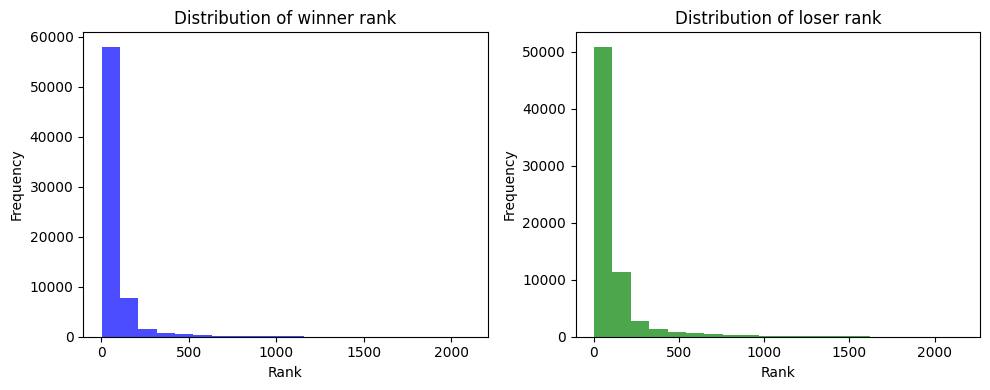

In [16]:
matches_with_rank = matches_df.loc[~matches_df['winner_rank'].isnull() & ~matches_df['loser_rank'].isnull()]

# Plot 2 histograms for distribution of values for "rank"
# Create subplots for the histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first histogram for winner_rank
ax1.hist(matches_with_rank['winner_rank'], bins=20, color='blue', alpha=0.7)
ax1.set_title('Distribution of winner rank')
ax1.set_xlabel('Rank')
ax1.set_ylabel('Frequency')

# Plot the second histogram for loser_rank
ax2.hist(matches_with_rank['loser_rank'], bins=20, color='green', alpha=0.7)
ax2.set_title('Distribution of loser rank')
ax2.set_xlabel('Rank')
ax2.set_ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()

The histogram shows that most matches are won by players ranked in the top 100 (~60'000), which makes sense. Also, there are no outlier values like rank=5'000.

#### Tournament start dates
It would be interesting to see on which weekdays tournaments start. Becuase later, we want to link the rankings data with the matches data, so a common day of the week  would be required.

In [17]:
# convert date from tourney_date 
matches_tournament_starts = matches_df.copy()
matches_tournament_starts['tourney_date_dt'] = pd.to_datetime(matches_df['tourney_date'], format='%Y%m%d')

# create a column representing the day of the week
matches_tournament_starts['tourney_date_dt_day_name'] = matches_tournament_starts['tourney_date_dt'].dt.day_name()

# day of week frequency for matches and rankingsday of week frequency for matches and rankings
matches_tournament_starts['tourney_date_dt_day_name'].value_counts(normalize=True)

tourney_date_dt_day_name
Monday      0.809
Friday      0.088
Sunday      0.074
Thursday    0.013
Wednesday   0.011
Saturday    0.004
Tuesday     0.001
Name: proportion, dtype: float64

As seen above, ca. **81%** of the matches started on a Monday. This is a strong case to say that for simplicity, we set all matches to start at the beginning of the week which would be Monday. But before doing this, let's see which matches don't start on a Monday and group by tournament type, then display the results using a bar chart.

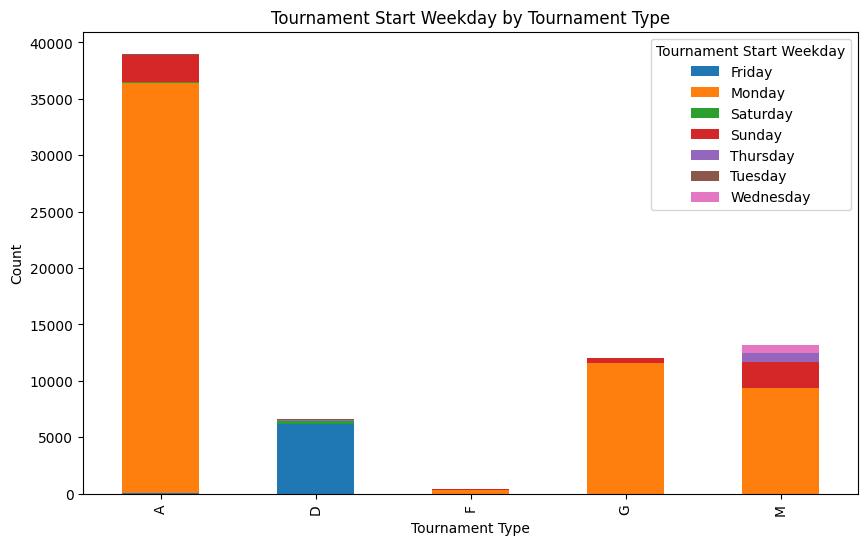

In [18]:
# Group the matches_tournament_starts by 'tourney_level' and 'tourney_date_dt_day_name' and count the occurrences
matches_tournament_starts = matches_tournament_starts.groupby(['tourney_level', 'tourney_date_dt_day_name']).size().unstack().fillna(0)

# Create a stacked bar chart
matches_tournament_starts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Tournament Type')
plt.ylabel('Count')
plt.title('Tournament Start Weekday by Tournament Type')

# Display the legend
plt.legend(title='Tournament Start Weekday', loc='upper right')

# Show the plot
plt.show()

From [matches_data_dictionary.txt](data/matches_data_dictionary.txt):
- 'G' = Grand Slams
- 'M' = Masters 1000s
- 'A' = other tour-level events
- 'C' = Challengers
- 'S' = Satellites/ITFs
- 'F' = Tour finals and other season-ending events
- 'D' = Davis Cup 

Most tournaments start on a Monday, with a notable exception: Davis Cup, which are run over weekends and start on a Friday. 
**Decision**: For better linking with rankings, we've decided that we will set all tournaments' start dates to the Monday which precedes it. For example, if its Friday yyyy-mm-dd, then a supplemental date feature will be provided for its preceding Monday yyyy-mm-dd.

### Prediction benchmark for matches
In order to evaluate the prediction accuracy of our model, we need a benchmark to compare when predicting the results of matches. One simple benchmark would be to assume that the higher (i.e. closer to 1) ranked player will always win. This "higher-ranked player win ratio" can easily be calculated using the features available in the original dataset.
We know that some rankings are empty, so we will just substitute a number higher than the max. ranking (which is 2101).

In [19]:
# setting a prediction benchmark, empty ranking means no ranking, so replace with a arbitrary high value
matches_wins_by_ranking_df = matches_df.copy()
matches_wins_by_ranking_df[['winner_rank','loser_rank']] = matches_wins_by_ranking_df[['winner_rank','loser_rank']].fillna(value=10000)

# add a new feature which is the result of checking whether the winner was ranked higher (i.e. closer to 1) than the loser
matches_wins_by_ranking_df['winning_player_ranked'] = matches_wins_by_ranking_df.apply(lambda x: "higher" if x['winner_rank'] < x['loser_rank'] else "lower", axis=1)
matches_wins_by_ranking_df['winning_player_ranked'].value_counts(normalize=True)*100

winning_player_ranked
higher   65.638
lower    34.362
Name: proportion, dtype: float64

So we see that for our dataset, the higher ranked player won **65.6%** of all the matches. This will be our benchmark for evaluating the model.

### Load rankings
Data is also available in the form of ranking of ATP players. It may be required to supplement the missing data for current rankings in the matches dataset, for example, a player doesn't have a ranking at the time of playing a match. 

### Exploring the rankings data

In [20]:
# create a list of rankings (since the year 2000 ) files to load
atp_rankings_files = [f'{DIRNAME}/atp_rankings_{year}.csv' for year in ['00s','10s', '20s', 'current']]

In [21]:
# create an empty dataframe to store all rankings
rankings_df = pd.DataFrame()

# loop through the list of rankings files, read them and append the data to the combined DataFrame
for filen in atp_rankings_files:
    rankings_df = pd.concat([rankings_df, pd.read_csv(filen, index_col=None)])


In [22]:
# explore the rankings data
rankings_df.head()

,ranking_date,rank,player,points
0,20000110,1,101736,4135.000
1,20000110,2,102338,2915.000
2,20000110,3,101948,2419.000
3,20000110,4,103017,2184.000
4,20000110,5,102856,2169.000


In [23]:
# get an overview of number of features, instances, empty values and data types 
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140631 entries, 0 to 58510
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ranking_date  int64  
 1   rank          int64  
 2   player        int64  
 3   points        float64
dtypes: float64(1), int64(3)
memory usage: 81.7 MB


In [24]:
# sanity checks on the data (min values, max values, etc.)
rankings_df.describe()

,ranking_date,rank,player,points
count,2140631.000,2140631.000,2140631.000,2139882.000
mean,20112972.331,941.096,119768.989,117.056
std,66763.213,547.581,31216.724,455.880
min,20000110.000,1.000,100149.000,1.000
25%,20060213.000,470.000,104128.000,2.000
50%,20110919.000,946.000,105498.000,10.000
75%,20170306.000,1381.000,120568.000,65.000
max,20230911.000,2271.000,212464.000,16950.000


From the above table, the min and max values for the rankings make sense. Also, the ranking_date makes sense. Finally, there are no missing values, so no data cleaning is required on this dataset.

In [25]:
print("Amount of instances and features: " + str(rankings_df.shape))

Amount of instances and features: (2140631, 4)


#### Ranking dates
Similar to which weekdays tournaments start, let's look at the days on which the rankings get updated. Becuase later, we want to link the rankings data with the matches data, so a common day of the week  would be required.

In [26]:
# convert date from ranking_date 
ranking_update = rankings_df.copy()
ranking_update['ranking_date_dt'] = pd.to_datetime(rankings_df['ranking_date'], format='%Y%m%d')

# create a column representing the day of the week
ranking_update['ranking_date_dt_day_name'] = ranking_update['ranking_date_dt'].dt.day_name()

# day of week frequency for ranking
ranking_update['ranking_date_dt_day_name'].value_counts(normalize=True)

ranking_date_dt_day_name
Monday   1.000
Name: proportion, dtype: float64

**All (100%)** of the rankings are updated on a Monday. Therefore, we are aligned with the idea to set all tournament start dates to a Monday.

Below is a final view of the loaded data for rankings, with the new column for the datetime formatted `ranking_date_dt`

In [27]:
# check data types
print(rankings_df.info())

# preview data
rankings_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2140631 entries, 0 to 58510
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ranking_date  int64  
 1   rank          int64  
 2   player        int64  
 3   points        float64
dtypes: float64(1), int64(3)
memory usage: 81.7 MB
None


,ranking_date,rank,player,points
0,20000110,1,101736,4135.000
1,20000110,2,102338,2915.000
2,20000110,3,101948,2419.000
3,20000110,4,103017,2184.000
4,20000110,5,102856,2169.000


## Data processing and cleaning <a name="data-processing-cleaning"></a>

### Scope of processing and cleaning
1. Replace the matches' winner and loser columns
2. Clean the date features and make them consistent
3. Ensure the matches are sorted as needed
4. Remove matches with result as W/O
5. Players without rankings: 
- seasoned players  (they had a long layoff due to injury, etc.). keep match and lookup ranking from earlier. Apply penalty of 10 ranking places for each week they were absent.
- if they played less than 10 matches (cumulative) - remove match


### Execute the processing and cleaning

#### Start with a copy of the original loaded dataframes

In [28]:
matches_processed_df = matches_df.copy()
matches_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71213 entries, 0 to 2368
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          71213 non-null  object 
 1   tourney_name        71213 non-null  object 
 2   surface             71213 non-null  object 
 3   draw_size           71213 non-null  int64  
 4   tourney_level       71213 non-null  object 
 5   tourney_date        71213 non-null  int64  
 6   match_num           71213 non-null  int64  
 7   winner_id           71213 non-null  int64  
 8   winner_seed         29586 non-null  float64
 9   winner_entry        8944 non-null   object 
 10  winner_name         71213 non-null  object 
 11  winner_hand         71204 non-null  object 
 12  winner_ht           69582 non-null  float64
 13  winner_ioc          71213 non-null  object 
 14  winner_age          71208 non-null  float64
 15  loser_id            71213 non-null  int64  
 16  loser_seed

In [29]:
rankings_processed_df = rankings_df.copy()
rankings_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140631 entries, 0 to 58510
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ranking_date  int64  
 1   rank          int64  
 2   player        int64  
 3   points        float64
dtypes: float64(1), int64(3)
memory usage: 81.7 MB


#### Hide winner and loser from columns names
Replace columns starting with 'winner_' and 'loser_' with 'player_1_' and 'player_2_' for the required features. As we want to be able to predict who will be the winner and the loser in each match, we remove the 'winner_' and 'loser_' columns for each match, and instead replace it with player_1_ and player_2 according to which the ranking of the players. 

The features starting with 'w_' and 'l_' are measures recorded during the match and will not be used in the model for predicting the outcome, so we remove these features.
We will add a column at the end of the dataframe, which will serve as our y variable.

In [30]:
def hide_winner_loser(input_df):
    # List of required features to be replaced with prefixes player_1 and player_2
    features = ['id', 'seed', 'entry', 'name', 'hand', 'ht', 'ioc', 'age', 'rank', 'rank_points']
    
    # Copy the input DataFrame to a new one
    df = input_df.copy()

    # Add player_1_name and player_2_name columns based on higher rank
    df['player_1_name'] = np.where((df['winner_rank'].fillna(float('inf')) <= df['loser_rank'].fillna(float('inf'))),
                                   df['winner_name'],
                                   df['loser_name']
                                   )
    df['player_2_name'] = np.where((df['winner_rank'].fillna(float('inf')) > df['loser_rank'].fillna(float('inf'))),
                                   df['winner_name'],
                                   df['loser_name']
                                   )

    # Transfer the values from 'winner_' and 'loser_' features to 'player_1_' and 'player_2_' features, according to who was the winner & loser
    for feat in features:
        player_1_feature = np.where(df['player_1_name'] == df['winner_name'],
                                    df['winner_' + feat],
                                    df['loser_' + feat]
                                    )
        player_2_feature = np.where(df['player_2_name'] == df['winner_name'],
                                    df['winner_' + feat],
                                    df['loser_' + feat]
                                    )
        df['player_1_' + feat] = player_1_feature
        df['player_2_' + feat] = player_2_feature   

          
    # Add a winner column
    df['winner'] = df.apply(lambda row: 'player_1' if row['winner_name'] == row['player_1_name'] else 'player_2', axis=1)

    # Remove columns starting with 'winner_' and 'loser_' (they have been replaced by player_1_ and player_2_)
    df = df.loc[:, ~df.columns.str.startswith('winner_') & ~df.columns.str.startswith('loser_')]

    # Remove columns starting with 'w_' and 'l_' (not needed for predicting_)
    df = df.loc[:, ~df.columns.str.startswith('w_') & ~df.columns.str.startswith('l_')]

    return df

Let us test the function hide_winner_loser with a sample dataset of 5 instances. Observe the renamed features, from "winnner_" and "loser_" to "player_1" and " player_2", and the new feature called "winner" (our y variable).

In [31]:
output_df = hide_winner_loser(sample_matches_df)
output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tourney_id            5 non-null      object 
 1   tourney_name          5 non-null      object 
 2   surface               5 non-null      object 
 3   draw_size             5 non-null      int64  
 4   tourney_level         5 non-null      object 
 5   tourney_date          5 non-null      int64  
 6   match_num             5 non-null      int64  
 7   score                 5 non-null      object 
 8   best_of               5 non-null      int64  
 9   round                 5 non-null      object 
 10  minutes               5 non-null      float64
 11  player_1_name         5 non-null      object 
 12  player_2_name         5 non-null      object 
 13  player_1_id           5 non-null      int64  
 14  player_2_id           5 non-null      int64  
 15  player_1_seed         3 non

In [32]:
output_df[['tourney_id'
           , 'player_1_name', 'player_1_rank'
           , 'player_2_name', 'player_2_rank']]

,tourney_id,player_1_name,player_1_rank,player_2_name,player_2_rank
0,2000-301,Tommy Haas,11.000,Jeff Tarango,63.000
1,2000-301,Franco Squillari,49.000,Juan Balcells,211.000
2,2000-301,Alberto Martin,48.000,Alberto Berasategui,59.000
3,2000-301,Juan Carlos Ferrero,45.000,Roger Federer,61.000
4,2000-301,Nicolas Escude,34.000,Michael Sell,167.000


In [33]:
# replace the winner and loser columns with player_1 and player_2 for the matches dataset
matches_processed_df= hide_winner_loser(matches_processed_df)
matches_processed_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,player_1_name,player_2_name,player_1_id,player_2_id,player_1_seed,player_2_seed,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_ioc,player_2_ioc,player_1_age,player_2_age,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,winner
0,2000-301,Auckland,Hard,32,A,20000110,1,7-5 4-6 7-5,3,R32,108.000,Tommy Haas,Jeff Tarango,103163,101543,1.000,NaN,NaN,NaN,R,L,188.000,180.000,GER,USA,21.700,31.100,11.000,63.000,1612.000,595.000,player_1
1,2000-301,Auckland,Hard,32,A,20000110,2,7-5 7-5,3,R32,85.000,Franco Squillari,Juan Balcells,102644,102607,NaN,NaN,NaN,Q,L,R,183.000,190.000,ARG,ESP,24.300,24.500,49.000,211.000,723.000,157.000,player_2
2,2000-301,Auckland,Hard,32,A,20000110,3,6-3 6-1,3,R32,56.000,Alberto Martin,Alberto Berasategui,103252,102238,NaN,NaN,NaN,NaN,R,R,175.000,173.000,ESP,ESP,21.300,26.500,48.000,59.000,726.000,649.000,player_1
3,2000-301,Auckland,Hard,32,A,20000110,4,6-4 6-4,3,R32,68.000,Juan Carlos Ferrero,Roger Federer,103507,103819,7.000,NaN,NaN,NaN,R,R,183.000,185.000,ESP,SUI,19.900,18.400,45.000,61.000,768.000,616.000,player_1
4,2000-301,Auckland,Hard,32,A,20000110,5,0-6 7-6(7) 6-1,3,R32,115.000,Nicolas Escude,Michael Sell,102765,102103,4.000,NaN,NaN,Q,R,R,185.000,180.000,FRA,USA,23.700,27.300,34.000,167.000,873.000,219.000,player_2


#### Clean and consistent date features

In [34]:
# create new column for datetime datatype version of the date columns
matches_processed_df['tourney_date_dt'] = pd.to_datetime(matches_processed_df['tourney_date'], format='%Y%m%d')
rankings_processed_df['ranking_date_dt'] = pd.to_datetime(rankings_processed_df['ranking_date'], format='%Y%m%d')

#### Ensure the matches are sorted as needed
This is crucial as we are calculating cumulative measures (e.g. count of prior matches) to base a prediction on. It's not required for the rankings dataset.

In [35]:
# sort matches by tourney_date, tourney_id and match_num, and reset the index as the old one is not required anymore.
matches_processed_df = matches_processed_df.sort_values(['tourney_date', 'tourney_id', 'match_num'], ascending=True)
matches_processed_df = matches_processed_df.reset_index(drop=True) 
matches_processed_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,player_1_name,player_2_name,player_1_id,player_2_id,player_1_seed,player_2_seed,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_ioc,player_2_ioc,player_1_age,player_2_age,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,winner,tourney_date_dt
0,2000-339,Adelaide,Hard,32,A,20000103,1,6-3 6-4,3,R32,76.000,Thomas Enqvist,Arnaud Clement,102358,103096,1.000,NaN,NaN,NaN,R,R,190.000,173.000,SWE,FRA,25.700,22.000,4.000,56.000,2606.000,805.000,player_1,2000-01-03
1,2000-339,Adelaide,Hard,32,A,20000103,2,6-1 6-4,3,R32,45.000,Roger Federer,Jens Knippschild,103819,102533,NaN,NaN,NaN,NaN,R,R,185.000,190.000,SUI,GER,18.300,24.800,64.000,91.000,749.000,525.000,player_1,2000-01-03
2,2000-339,Adelaide,Hard,32,A,20000103,3,3-6 7-6(5) 6-4,3,R32,115.000,Jan Michael Gambill,Wayne Arthurs,102998,101885,NaN,NaN,NaN,NaN,R,L,190.000,190.000,USA,AUS,22.500,28.700,58.000,105.000,803.000,449.000,player_1,2000-01-03
3,2000-339,Adelaide,Hard,32,A,20000103,4,6-2 6-1,3,R32,65.000,Sebastien Grosjean,Andrew Ilie,103206,102776,7.000,NaN,NaN,NaN,R,R,175.000,180.000,FRA,AUS,21.500,23.600,27.000,54.000,1298.000,845.000,player_1,2000-01-03
4,2000-339,Adelaide,Hard,32,A,20000103,5,6-4 6-4,3,R32,68.000,Magnus Norman,Scott Draper,102796,102401,3.000,NaN,NaN,WC,R,L,188.000,178.000,SWE,AUS,23.500,25.500,15.000,154.000,1748.000,297.000,player_1,2000-01-03


#### Remove matches with result as W/O
W/O stands for "Walkover". Matches resulting in W/O should not be considered, so remove them. 

In [36]:
# remove matches resulting in a W/O
matches_processed_df = matches_processed_df[matches_processed_df['score'] != 'W/O']
len(matches_processed_df)

70910

Down from 71'213 to 70'910 instances

#### Add feature for matches dataset that all tournaments start dates are shown as a Monday

In [37]:
# add feature for tournaments not starting on a Monday, with its value being the preceding Monday
matches_processed_df['tourney_date_dt'] = pd.to_datetime(matches_processed_df['tourney_date'], format='%Y%m%d')
matches_processed_df['tourney_date_dt_preceding_monday'] = matches_processed_df['tourney_date_dt'].apply(lambda x: x - pd.DateOffset(days=x.weekday()) if x.weekday() != 0 else x)

# verify that this feature's date values are all on a Monday
matches_processed_df['tourney_date_dt_preceding_monday'].dt.day_name().value_counts()

tourney_date_dt_preceding_monday
Monday    70910
Name: count, dtype: int64

In [38]:
# check examples of these new column values compared to its original
matches_processed_df[matches_processed_df['tourney_date_dt'].dt.day_name() != 'Monday'][['tourney_date_dt', 'tourney_date_dt_preceding_monday']].groupby(['tourney_date_dt', 'tourney_date_dt_preceding_monday']).size().reset_index(name='count').head(3)

,tourney_date_dt,tourney_date_dt_preceding_monday,count
0,2000-01-28,2000-01-24,6
1,2000-02-04,2000-01-31,88
2,2000-03-17,2000-03-13,4


- 28 Jan. 2000 was a Friday, and 24 Jan. 2000 was the preceding Monday
- 4 Feb. 2000 was a Friday, and 31 Jan. 2000 was the preceding Monday
- 17 Mar. 2000 was a Friday, and 13 Mar. 2000 was the preceding Monday

#### Process matches with seasoned players having no ranking
As explained before, there are matches with seasoned (experienced on the ATP Tour) players having no (empty) rank possibly because they have been inactive due to injury and hence lost their ranking before returning. If they are not new players, we can try and look up their last valid ranking in the rankings file. A recent example is Kevin Anderson, who was inactive for a period due to retiring in May 2022 and then announcing his comeback in July 2023* 

*Source: [Wikipedia "Kevin_Anderson (tennis)", accessed Oct. 2023](https://en.wikipedia.org/wiki/Kevin_Anderson_(tennis))

We will: 
1. for a particular match, find the latest available historical ranking in the rankings dataset for the player in the matches dataset
2. add 10 to the ranking for each week where the player was inactive.

In [39]:
# example of player previously having a ranking but later no ranking
matches_processed_ka_df = matches_processed_df[(matches_processed_df['player_1_name'] == 'Kevin Anderson') 
                                                | (matches_processed_df['player_2_name'] == 'Kevin Anderson')].tail()
matches_processed_ka_df[['tourney_date_dt', 'player_1_id', 'player_2_id', 'player_1_name', 'player_2_name', 'player_1_rank', 'player_2_rank']]

,tourney_date_dt,player_1_id,player_2_id,player_1_name,player_2_name,player_1_rank,player_2_rank
66779,2022-03-21,104731,207678,Kevin Anderson,Juan Manuel Cerundolo,91.000,122.000
70693,2023-07-17,209113,104731,Gabriel Diallo,Kevin Anderson,141.000,NaN
70704,2023-07-17,133835,104731,Gijs Brouwer,Kevin Anderson,145.000,NaN
70710,2023-07-17,200005,104731,Ugo Humbert,Kevin Anderson,40.000,NaN
70867,2023-07-31,111442,104731,Jordan Thompson,Kevin Anderson,71.000,652.000


In [40]:
# define static parameter
rank_penalty_per_week_inactivity = 10

# define a function to look up historic rankings for players having no ranking in a particular match
def impute_missing_rankings(m, r):
    last_rankings = {}  # Dictionary to store the last available player_rank for each player_id

    for i, row in m.iterrows():
        if pd.isna(row['player_1_rank']):
            week = row['tourney_date_dt'] - dt.timedelta(days=row['tourney_date_dt'].weekday())
            p1_id = row['player_1_id']

            # Find the last available ranking date prior to the tourney_date_dt
            last_ranking_date = r[(r['player'] == p1_id) & (r['ranking_date_dt'] < week)]['ranking_date_dt'].max()

            if last_ranking_date:
                last_ranking_row = r[(r['player'] == p1_id) & (r['ranking_date_dt'] == last_ranking_date)]
                if not last_ranking_row.empty:
                    last_rank = last_ranking_row['rank'].values[0]
                    weeks_difference = (week - last_ranking_date).days // 7
                    imputed_rank = last_rank + weeks_difference * rank_penalty_per_week_inactivity
                    if imputed_rank > 3333: # Don't over-penalize
                        m.at[i, 'player_1_rank'] = 3333   # Set a default value   
                    else: 
                        m.at[i, 'player_1_rank'] = imputed_rank
                        last_rankings[p1_id] = imputed_rank
                else:
                    m.at[i, 'player_1_rank'] = 3333  # Set a default value
            else:
                m.at[i, 'player_1_rank'] = 3333  # Set a default value

        if pd.isna(row['player_2_rank']):
            week = row['tourney_date_dt'] - dt.timedelta(days=row['tourney_date_dt'].weekday())
            p2_id = row['player_2_id']

            # Find the last available ranking date prior to the tourney_date_dt
            last_ranking_date = r[(r['player'] == p2_id) & (r['ranking_date_dt'] < week)]['ranking_date_dt'].max()

            if last_ranking_date:
                last_ranking_row = r[(r['player'] == p2_id) & (r['ranking_date_dt'] == last_ranking_date)]
                if not last_ranking_row.empty:
                    last_rank = last_ranking_row['rank'].values[0]
                    weeks_difference = (week - last_ranking_date).days // 7
                    imputed_rank = last_rank + weeks_difference * rank_penalty_per_week_inactivity
                    if imputed_rank > 3333: # Don't over-penalize
                        m.at[i, 'player_2_rank'] = 3333   # Set a default value   
                    else:
                        m.at[i, 'player_2_rank'] = imputed_rank
                        last_rankings[p2_id] = imputed_rank
                else: 
                    m.at[i, 'player_2_rank'] = 3333  # Set a default value
            else:
                m.at[i, 'player_2_rank'] = 3333  # Set a default value


Test the function using the example of Kevin Anderson:

In [41]:
# test function using only reduced dataset: Kevin Anderson
impute_missing_rankings(matches_processed_ka_df, rankings_processed_df)
matches_processed_ka_df[['tourney_date_dt', 'player_1_name', 'player_2_name', 'player_1_rank', 'player_2_rank','round', 'winner']]

,tourney_date_dt,player_1_name,player_2_name,player_1_rank,player_2_rank,round,winner
66779,2022-03-21,Kevin Anderson,Juan Manuel Cerundolo,91.000,122.000,R64,player_2
70693,2023-07-17,Gabriel Diallo,Kevin Anderson,141.000,704.000,R32,player_2
70704,2023-07-17,Gijs Brouwer,Kevin Anderson,145.000,704.000,R16,player_2
70710,2023-07-17,Ugo Humbert,Kevin Anderson,40.000,704.000,QF,player_1
70867,2023-07-31,Jordan Thompson,Kevin Anderson,71.000,652.000,R64,player_1


In [42]:
rankings_processed_df[(rankings_processed_df['ranking_date'].between(20220501, 20230801)) & (rankings_processed_df['player'] == 104731)]

,ranking_date,rank,player,points,ranking_date_dt
182305,20220502,107,104731,602.000,2022-05-02
184458,20220509,104,104731,602.000,2022-05-09
186590,20220516,104,104731,597.000,2022-05-16
188736,20220523,104,104731,597.000,2022-05-23
45886,20230724,645,104731,45.000,2023-07-24
47944,20230731,652,104731,45.000,2023-07-31


In [43]:
weeks_ka_inactive = (dt.date(2023,7,17) - dt.date(2022,5,23)).days  // 7 # no. or weeks inactivity
weeks_ka_inactive * 10 # rank place penalty of 10 per week

600

The penalty of roughly 600 places for a 60 week period of inactivity reflects roughly the output of the function impute_missing_rankings.

Finally, we apply the function to our full dataset, and do a small check to verify that no null values exist anymore for these features:

In [44]:
impute_missing_rankings(matches_processed_df, rankings_processed_df)

In [45]:
matches_processed_df['player_1_rank'].isna().value_counts()

player_1_rank
False    70910
Name: count, dtype: int64

In [46]:
matches_processed_df['player_2_rank'].isna().value_counts()

player_2_rank
False    70910
Name: count, dtype: int64

In [47]:
matches_processed_df[['player_1_rank', 'player_2_rank']].describe()

,player_1_rank,player_2_rank
count,70910.000,70910.000
mean,71.792,201.093
std,217.660,467.177
min,1.000,2.000
25%,14.000,53.000
50%,33.000,86.000
75%,63.000,143.000
max,3333.000,3333.000


#### Add feature for year
Will be used later for segmenting the dataset

In [48]:
matches_processed_df['tourney_year'] = pd.DatetimeIndex(matches_processed_df['tourney_date_dt']).year

## Feature Engineering <a name="feature-engineering"></a>

In [49]:
# make a new copy of the dataframe, for starting the feature engineering
matches_features_df = matches_processed_df.copy().reset_index(drop=True)
matches_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70910 entries, 0 to 70909
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   tourney_id                        70910 non-null  object        
 1   tourney_name                      70910 non-null  object        
 2   surface                           70910 non-null  object        
 3   draw_size                         70910 non-null  int64         
 4   tourney_level                     70910 non-null  object        
 5   tourney_date                      70910 non-null  int64         
 6   match_num                         70910 non-null  int64         
 7   score                             70910 non-null  object        
 8   best_of                           70910 non-null  int64         
 9   round                             70910 non-null  object        
 10  minutes                           63229 non-nu

### Add feature for ranking difference
This feature may help our model more easily assess the how the ranking plays a factor in determining the winner of the match. It simply calculates the weight of the difference between player_2_rank and player_1_rank, by using a normalized difference. The normalized difference is expressed as a number between 0 and 1. In that case, the closer the ranking between player 1 and player 2, the higher the number will be.

In [50]:
# calculate max. possible rank difference
max_possible_rank_difference = max(matches_features_df['player_2_rank'] - matches_features_df['player_1_rank'])

# calculate normalized rank difference
matches_features_df['ranking_difference'] = 1 - ((matches_features_df['player_2_rank'] - matches_features_df['player_1_rank']) / max_possible_rank_difference)

# preview the result for the last 32 observations of the dataset
matches_features_df[['tourney_date_dt', 'player_1_name', 'player_1_rank','player_2_name', 'player_2_rank', 'ranking_difference']].tail(32)

,tourney_date_dt,player_1_name,player_1_rank,player_2_name,player_2_rank,ranking_difference
70878,2023-08-28,Novak Djokovic,2.000,Bernabe Zapata Miralles,76.000,0.978
70879,2023-08-28,Carlos Alcaraz,1.000,Daniel Evans,28.000,0.992
70880,2023-08-28,Cameron Norrie,16.000,Matteo Arnaldi,61.000,0.986
70881,2023-08-28,Alexander Zverev,12.000,Grigor Dimitrov,19.000,0.998
70882,2023-08-28,Jannik Sinner,6.000,Stan Wawrinka,49.000,0.987
70883,2023-08-28,Daniil Medvedev,3.000,Sebastian Baez,32.000,0.991
70884,2023-08-28,Alex De Minaur,13.000,Nicolas Jarry,25.000,0.996
70885,2023-08-28,Michael Mmoh,89.000,Jack Draper,123.000,0.990
70886,2023-08-28,Andrey Rublev,8.000,Arthur Rinderknech,73.000,0.980
70887,2023-08-28,Zhizhen Zhang,67.000,Rinky Hijikata,110.000,0.987


In [51]:
# preview the result for the first 5 observations of the dataset
matches_features_df[['tourney_date_dt', 'player_1_name', 'player_1_rank','player_2_name', 'player_2_rank', 'ranking_difference']].head(5)

,tourney_date_dt,player_1_name,player_1_rank,player_2_name,player_2_rank,ranking_difference
0,2000-01-03,Thomas Enqvist,4.000,Arnaud Clement,56.000,0.984
1,2000-01-03,Roger Federer,64.000,Jens Knippschild,91.000,0.992
2,2000-01-03,Jan Michael Gambill,58.000,Wayne Arthurs,105.000,0.986
3,2000-01-03,Sebastien Grosjean,27.000,Andrew Ilie,54.000,0.992
4,2000-01-03,Magnus Norman,15.000,Scott Draper,154.000,0.958


### Add feature for cumulative matches played count, and win percentages per surface and tourney level for player 1 and player 2
This cumulative matches played count and win percentages per surface and tourney level are important features for our prediction model.

#### Surface win %
This feature will show a player's success so far on a particular tennis court surface. There will be a number expressed as a percentage which will reflect the number of wins divided by the total matches on a surface, prior to that match taking place.
First, what are the different surfaces being played on?

In [52]:
# what are the different surfaces played on since 2000?
matches_features_df['surface'].value_counts(normalize=True)

surface
Hard     0.541
Clay     0.327
Grass    0.103
Carpet   0.029
Name: proportion, dtype: float64

In [53]:
# what are the different surfaces played on in the top 10 tournaments in 2000?
print(matches_features_df[matches_features_df['surface'] == 'Hard']['tourney_name'].value_counts().head(10))
print(matches_features_df[matches_features_df['surface'] == 'Clay']['tourney_name'].value_counts().head(10))
print(matches_features_df[matches_features_df['surface'] == 'Grass']['tourney_name'].value_counts().head(10))
print(matches_features_df[matches_features_df['surface'] == 'Carpet']['tourney_name'].value_counts().head(10))


tourney_name
Australian Open         3042
US Open                 2535
Miami Masters           2172
Indian Wells Masters    2041
Cincinnati Masters      1372
Canada Masters          1301
Washington              1053
Tokyo                    816
Paris Masters            768
Dubai                    756
Name: count, dtype: int64
tourney_name
Roland Garros          3042
Rome Masters           1409
Monte Carlo Masters    1316
Barcelona              1179
Madrid Masters          803
Kitzbuhel               788
Buenos Aires            682
Munich                  668
Gstaad                  658
Estoril                 658
Name: count, dtype: int64
tourney_name
Wimbledon          2913
Queen's Club       1065
Halle               698
Newport             680
s Hertogenbosch     649
Nottingham          370
Eastbourne          336
Stuttgart           214
Antalya              81
Mallorca             79
Name: count, dtype: int64
tourney_name
Paris Masters                  327
Lyon                     

In [54]:
# create a test dataset for all 4 surface types, and preview the columns and sample rows relevant for calculation
matches_4surfaces = matches_features_df[(matches_features_df['tourney_name'].isin(['Auckland', 'Barcelona', 'Halle', 'Basel']))
					& (matches_features_df['tourney_date'] < 20010000)][['tourney_name', 'tourney_date_dt', 'match_num', 'surface', 'tourney_level'
                                                                                , 'player_1_id', 'player_2_id', 'player_1_name', 'player_2_name'
                                                                                , 'winner'
					]]
matches_4surfaces

,tourney_name,tourney_date_dt,match_num,surface,tourney_level,player_1_id,player_2_id,player_1_name,player_2_name,winner
93,Auckland,2000-01-10,1,Hard,A,103163,101543,Tommy Haas,Jeff Tarango,player_1
94,Auckland,2000-01-10,2,Hard,A,102644,102607,Franco Squillari,Juan Balcells,player_2
95,Auckland,2000-01-10,3,Hard,A,103252,102238,Alberto Martin,Alberto Berasategui,player_1
96,Auckland,2000-01-10,4,Hard,A,103507,103819,Juan Carlos Ferrero,Roger Federer,player_1
97,Auckland,2000-01-10,5,Hard,A,102765,102103,Nicolas Escude,Michael Sell,player_2
...,...,...,...,...,...,...,...,...,...,...
3095,Basel,2000-10-23,27,Carpet,A,102450,102271,Tim Henman,Hicham Arazi,player_1
3096,Basel,2000-10-23,28,Carpet,A,102358,103103,Thomas Enqvist,Dominik Hrbaty,player_1
3097,Basel,2000-10-23,29,Carpet,A,103720,103819,Lleyton Hewitt,Roger Federer,player_2
3098,Basel,2000-10-23,30,Carpet,A,102358,102450,Thomas Enqvist,Tim Henman,player_1


#### Tournament level win %
This feature will show a player's success so far on a particular type (level) of tournament. There will be a number expressed as a percentage which will reflect the number of wins divided by the total matches on that level, prior to that match taking place.
First, what are the different tournament level being played?  

In [55]:
# what are the different tournament levels played since 2000?
matches_features_df['tourney_level'].value_counts(normalize=True)

tourney_level
A   0.547
M   0.185
G   0.170
D   0.093
F   0.005
Name: proportion, dtype: float64

#### Function to calculate counts, differences and win %s

In [56]:
def calc_cum_match_counts_and_pct (df):

    # Initialize dictionaries to keep track of cumulative match counts and wins for each player and surface
    player_cumulative_counts = {}
    player_surface_cumulative_counts = {}
    player_surface_cumulative_wins = {}
    player_tourney_level_cumulative_counts = {}
    player_tourney_level_cumulative_wins = {}

    # Lists to store the cumulative match counts for each row
    player_1_cumulative_counts_list = []
    player_2_cumulative_counts_list = []
    player_1_surface_cumulative_counts_list = []
    player_2_surface_cumulative_counts_list = []
    player_1_surface_cumulative_wins_list = []
    player_2_surface_cumulative_wins_list = []
    player_1_tourney_level_cumulative_counts_list = []
    player_2_tourney_level_cumulative_counts_list = []
    player_1_tourney_level_cumulative_wins_list = []
    player_2_tourney_level_cumulative_wins_list = []

    for index, row in df.iterrows():
        player_1_id = row['player_1_id']
        player_2_id = row['player_2_id']
        surface = row['surface']
        tourney_level = row['tourney_level']

        # Get the cumulative match counts so far for each player
        player_1_cumulative_count = player_cumulative_counts.get(player_1_id, 0)
        player_2_cumulative_count = player_cumulative_counts.get(player_2_id, 0)

        # Get the cumulative match counts and wins on the current surface for each player
        player_1_surface_cumulative_count = player_surface_cumulative_counts.get((player_1_id, surface), 0)
        player_2_surface_cumulative_count = player_surface_cumulative_counts.get((player_2_id, surface), 0)
        player_1_surface_cumulative_wins = player_surface_cumulative_wins.get((player_1_id, surface), 0)
        player_2_surface_cumulative_wins = player_surface_cumulative_wins.get((player_2_id, surface), 0)

        # Get the cumulative match counts and wins on the current tourney level for each player
        player_1_tourney_level_cumulative_count = player_tourney_level_cumulative_counts.get((player_1_id, tourney_level), 0)
        player_2_tourney_level_cumulative_count = player_tourney_level_cumulative_counts.get((player_2_id, tourney_level), 0)
        player_1_tourney_level_cumulative_wins = player_tourney_level_cumulative_wins.get((player_1_id, tourney_level), 0)
        player_2_tourney_level_cumulative_wins = player_tourney_level_cumulative_wins.get((player_2_id, tourney_level), 0)

        # Update the cumulative match counts and wins for each player, surface and tourney level in the current players' lists
        player_1_cumulative_counts_list.append(player_1_cumulative_count)
        player_2_cumulative_counts_list.append(player_2_cumulative_count)
        player_1_surface_cumulative_counts_list.append(player_1_surface_cumulative_count)
        player_2_surface_cumulative_counts_list.append(player_2_surface_cumulative_count)
        player_1_tourney_level_cumulative_counts_list.append(player_1_tourney_level_cumulative_count)
        player_2_tourney_level_cumulative_counts_list.append(player_2_tourney_level_cumulative_count)

        # Calculate and update the cumulative match won percentage on the current surface for each player
        player_1_surface_cumulative_wins_percentage = (
            player_1_surface_cumulative_wins / player_1_surface_cumulative_count
        ) if player_1_surface_cumulative_count > 0 else 0.0
        player_2_surface_cumulative_wins_percentage = (
            player_2_surface_cumulative_wins / player_2_surface_cumulative_count
        ) if player_2_surface_cumulative_count > 0 else 0.0

        player_1_surface_cumulative_wins_list.append(player_1_surface_cumulative_wins_percentage)
        player_2_surface_cumulative_wins_list.append(player_2_surface_cumulative_wins_percentage)

        # Calculate and update the cumulative match won percentage on the current tourney level for each player
        player_1_tourney_level_cumulative_wins_percentage = (
            player_1_tourney_level_cumulative_wins / player_1_tourney_level_cumulative_count
        ) if player_1_tourney_level_cumulative_count > 0 else 0.0
        player_2_tourney_level_cumulative_wins_percentage = (
            player_2_tourney_level_cumulative_wins / player_2_tourney_level_cumulative_count
        ) if player_2_tourney_level_cumulative_count > 0 else 0.0

        player_1_tourney_level_cumulative_wins_list.append(player_1_tourney_level_cumulative_wins_percentage)
        player_2_tourney_level_cumulative_wins_list.append(player_2_tourney_level_cumulative_wins_percentage)

        # Increment the cumulative match counts and wins for each player and surface in the dictionaries
        player_cumulative_counts[player_1_id] = player_1_cumulative_count + 1
        player_cumulative_counts[player_2_id] = player_2_cumulative_count + 1
        player_surface_cumulative_counts[(player_1_id, surface)] = player_1_surface_cumulative_count + 1
        player_surface_cumulative_counts[(player_2_id, surface)] = player_2_surface_cumulative_count + 1
        player_tourney_level_cumulative_counts[(player_1_id, tourney_level)] = player_1_tourney_level_cumulative_count + 1
        player_tourney_level_cumulative_counts[(player_2_id, tourney_level)] = player_2_tourney_level_cumulative_count + 1

        # Increment the cumulative match wins on the current surface for the winner
        if row['winner'] == 'player_1':
            player_surface_cumulative_wins[(player_1_id, surface)] = player_1_surface_cumulative_wins + 1
        else:
            player_surface_cumulative_wins[(player_2_id, surface)] = player_2_surface_cumulative_wins + 1

        # Increment the cumulative match wins on the current tourney level for the winner
        if row['winner'] == 'player_1':
            player_tourney_level_cumulative_wins[(player_1_id, tourney_level)] = player_1_tourney_level_cumulative_wins + 1
        else:
            player_tourney_level_cumulative_wins[(player_2_id, tourney_level)] = player_2_tourney_level_cumulative_wins + 1

    # Add the cumulative match count and surface- and tourney level-related columns to the input dataset
    df['player_1_cum_match_count'] = player_1_cumulative_counts_list
    df['player_2_cum_match_count'] = player_2_cumulative_counts_list
    df['player_1_surface_cum_match_count'] = player_1_surface_cumulative_counts_list
    df['player_2_surface_cum_match_count'] = player_2_surface_cumulative_counts_list
    df['player_1_surface_cum_win_percentage'] = player_1_surface_cumulative_wins_list
    df['player_2_surface_cum_win_percentage'] = player_2_surface_cumulative_wins_list
    df['player_1_tourney_level_cum_match_count'] = player_1_tourney_level_cumulative_counts_list
    df['player_2_tourney_level_cum_match_count'] = player_2_tourney_level_cumulative_counts_list
    df['player_1_tourney_level_cum_win_percentage'] = player_1_tourney_level_cumulative_wins_list
    df['player_2_tourney_level_cum_win_percentage'] = player_2_tourney_level_cumulative_wins_list

    # Add matches played difference
    df['matches_played_difference'] = df['player_1_cum_match_count'] - df['player_2_cum_match_count']

    # Add win percentage difference columns for surface- and tourney level
    df['surface_win_pct_difference'] = df['player_1_surface_cum_win_percentage'] - df['player_2_surface_cum_win_percentage']
    df['tourney_level_win_pct_difference'] = df['player_1_tourney_level_cum_win_percentage'] - df['player_2_tourney_level_cum_win_percentage']
    
    return df

In [57]:
# Apply the function to the data
matches_features_df = calc_cum_match_counts_and_pct(matches_features_df)

#### Test the function on some data

In [58]:
# test matches played difference for some matches between 2 players
matches_features_df[(matches_features_df['player_1_name'] == 'Roger Federer') 
                     &
                     (matches_features_df['player_2_name'] == 'Rafael Nadal')
                     &
                    (matches_features_df['tourney_year'] >= 2004)][['tourney_name', 'tourney_date_dt', 'match_num', 'surface', 'tourney_level'
                                                                                , 'player_1_name', 'player_2_name'
                                                                                , 'winner'
                                                                                , 'matches_played_difference'
                                                                                 ]]

,tourney_name,tourney_date_dt,match_num,surface,tourney_level,player_1_name,player_2_name,winner,matches_played_difference
13947,Miami Masters,2004-03-22,65,Hard,M,Roger Federer,Rafael Nadal,player_2,288
17323,Miami Masters,2005-03-21,95,Hard,M,Roger Federer,Rafael Nadal,player_1,323
17925,Roland Garros,2005-05-23,125,Clay,G,Roger Federer,Rafael Nadal,player_2,313
20317,Dubai,2006-02-27,31,Hard,A,Roger Federer,Rafael Nadal,player_2,322
20779,Monte Carlo Masters,2006-04-17,63,Clay,M,Roger Federer,Rafael Nadal,player_2,328
20990,Rome Masters,2006-05-08,63,Clay,M,Roger Federer,Rafael Nadal,player_2,323
21236,Roland Garros,2006-05-29,127,Clay,G,Roger Federer,Rafael Nadal,player_2,323
21511,Wimbledon,2006-06-26,127,Grass,G,Roger Federer,Rafael Nadal,player_1,325
22841,Masters Cup,2006-11-13,4,Hard,F,Roger Federer,Rafael Nadal,player_1,341
24061,Monte Carlo Masters,2007-04-15,55,Clay,M,Roger Federer,Rafael Nadal,player_2,333


In [59]:
# test surface win pct and tourney level win pct for one player
matches_features_df[(matches_features_df['player_1_name'] == 'Roger Federer') 
                     |
                     (matches_features_df['player_2_name'] == 'Roger Federer')][['tourney_name', 'tourney_date_dt', 'match_num', 'surface', 'tourney_level'
                                                                                , 'player_1_name', 'player_2_name'
                                                                                , 'winner'
                                                                                 , 'player_1_surface_cum_win_percentage','player_2_surface_cum_win_percentage'
                                                                                 , 'player_1_tourney_level_cum_win_percentage','player_2_tourney_level_cum_win_percentage'
                                                                                 , 'surface_win_pct_difference', 'tourney_level_win_pct_difference'
                                                                                 ]]

,tourney_name,tourney_date_dt,match_num,surface,tourney_level,player_1_name,player_2_name,winner,player_1_surface_cum_win_percentage,player_2_surface_cum_win_percentage,player_1_tourney_level_cum_win_percentage,player_2_tourney_level_cum_win_percentage,surface_win_pct_difference,tourney_level_win_pct_difference
1,Adelaide,2000-01-03,2,Hard,A,Roger Federer,Jens Knippschild,player_1,0.000,0.000,0.000,0.000,0.000,0.000
16,Adelaide,2000-01-03,17,Hard,A,Thomas Enqvist,Roger Federer,player_1,1.000,1.000,1.000,1.000,0.000,0.000
96,Auckland,2000-01-10,4,Hard,A,Juan Carlos Ferrero,Roger Federer,player_1,0.000,0.500,0.000,0.500,-0.500,-0.500
206,Australian Open,2000-01-17,52,Hard,G,Michael Chang,Roger Federer,player_2,0.800,0.333,0.000,0.000,0.467,0.000
244,Australian Open,2000-01-17,90,Hard,G,Roger Federer,Jan Kroslak,player_1,0.500,0.500,1.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64434,Wimbledon,2021-06-28,148,Grass,G,Roger Federer,Adrian Mannarino,player_1,0.879,0.589,0.865,0.429,0.290,0.437
64473,Wimbledon,2021-06-28,188,Grass,G,Roger Federer,Richard Gasquet,player_1,0.880,0.676,0.866,0.637,0.203,0.228
64493,Wimbledon,2021-06-28,208,Grass,G,Roger Federer,Cameron Norrie,player_1,0.880,0.524,0.866,0.462,0.356,0.404
64503,Wimbledon,2021-06-28,218,Grass,G,Roger Federer,Lorenzo Sonego,player_1,0.881,0.688,0.866,0.476,0.193,0.390


In [60]:
# test surface win pct and tourney level win pct for another player
matches_features_df[(matches_features_df['player_1_name'] == 'Thomas Enqvist') 
                    | (matches_features_df['player_2_name'] == 'Thomas Enqvist')][['tourney_name', 'tourney_date_dt', 'match_num', 'surface', 'tourney_level'
                                                                                , 'player_1_name', 'player_2_name'
                                                                                , 'winner'
                                                                                , 'player_1_surface_cum_win_percentage','player_2_surface_cum_win_percentage'
                                                                                , 'player_1_tourney_level_cum_win_percentage','player_2_tourney_level_cum_win_percentage'
                                                                                , 'surface_win_pct_difference', 'tourney_level_win_pct_difference']]

,tourney_name,tourney_date_dt,match_num,surface,tourney_level,player_1_name,player_2_name,winner,player_1_surface_cum_win_percentage,player_2_surface_cum_win_percentage,player_1_tourney_level_cum_win_percentage,player_2_tourney_level_cum_win_percentage,surface_win_pct_difference,tourney_level_win_pct_difference
0,Adelaide,2000-01-03,1,Hard,A,Thomas Enqvist,Arnaud Clement,player_1,0.000,0.000,0.000,0.000,0.000,0.000
16,Adelaide,2000-01-03,17,Hard,A,Thomas Enqvist,Roger Federer,player_1,1.000,1.000,1.000,1.000,0.000,0.000
24,Adelaide,2000-01-03,25,Hard,A,Thomas Enqvist,Sebastien Grosjean,player_1,1.000,1.000,1.000,1.000,0.000,0.000
28,Adelaide,2000-01-03,29,Hard,A,Thomas Enqvist,Magnus Norman,player_1,1.000,1.000,1.000,1.000,0.000,0.000
30,Adelaide,2000-01-03,31,Hard,A,Thomas Enqvist,Lleyton Hewitt,player_2,1.000,1.000,1.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17849,Roland Garros,2005-05-23,47,Clay,G,Thomas Enqvist,Lukas Dlouhy,player_2,0.491,0.000,0.583,0.000,0.491,0.583
18081,Wimbledon,2005-06-20,6,Grass,G,Hyung Taik Lee,Thomas Enqvist,player_1,0.476,0.524,0.429,0.571,-0.048,-0.143
19341,Stockholm,2005-10-10,7,Hard,A,Rainer Schuettler,Thomas Enqvist,player_1,0.594,0.571,0.568,0.554,0.024,0.015
19477,Lyon,2005-10-24,3,Carpet,A,Gregory Carraz,Thomas Enqvist,player_2,0.500,0.619,0.431,0.550,-0.119,-0.119


In [61]:
# test for 4 tournaments, each on different surface
matches_4surfaces_calc = calc_cum_match_counts_and_pct(matches_4surfaces)
matches_4surfaces_calc[['tourney_name', 'tourney_date_dt', 'match_num', 'surface'
                                                                                , 'player_1_name', 'player_2_name'
                                                                                , 'winner'
                                                                                 , 'player_1_surface_cum_win_percentage','player_2_surface_cum_win_percentage'
                                                                                 , 'surface_win_pct_difference', 'tourney_level_win_pct_difference']].head(10)

,tourney_name,tourney_date_dt,match_num,surface,player_1_name,player_2_name,winner,player_1_surface_cum_win_percentage,player_2_surface_cum_win_percentage,surface_win_pct_difference,tourney_level_win_pct_difference
93,Auckland,2000-01-10,1,Hard,Tommy Haas,Jeff Tarango,player_1,0.000,0.000,0.000,0.000
94,Auckland,2000-01-10,2,Hard,Franco Squillari,Juan Balcells,player_2,0.000,0.000,0.000,0.000
95,Auckland,2000-01-10,3,Hard,Alberto Martin,Alberto Berasategui,player_1,0.000,0.000,0.000,0.000
96,Auckland,2000-01-10,4,Hard,Juan Carlos Ferrero,Roger Federer,player_1,0.000,0.000,0.000,0.000
97,Auckland,2000-01-10,5,Hard,Nicolas Escude,Michael Sell,player_2,0.000,0.000,0.000,0.000
98,Auckland,2000-01-10,6,Hard,Michael Chang,Byron Black,player_1,0.000,0.000,0.000,0.000
99,Auckland,2000-01-10,7,Hard,Magnus Gustafsson,Mark Nielsen,player_1,0.000,0.000,0.000,0.000
100,Auckland,2000-01-10,8,Hard,Thomas Johansson,Glenn Weiner,player_1,0.000,0.000,0.000,0.000
101,Auckland,2000-01-10,9,Hard,Sjeng Schalken,Goran Ivanisevic,player_1,0.000,0.000,0.000,0.000
102,Auckland,2000-01-10,10,Hard,Markus Hantschk,Tomas Behrend,player_2,0.000,0.000,0.000,0.000


In [62]:
# create a test dataset for all 5 tournament levels, and preview the columns and sample rows relevant for calculation
matches_5levels = matches_features_df[(matches_features_df['tourney_name'].isin(['Auckland', 'Davis Cup QLS R1: GER vs SUI', 'Tour Finals', 'Australian Open', 'Indian Wells Masters',]))
					& (matches_features_df['tourney_date'] < 20010000)][['tourney_name', 'tourney_date_dt', 'match_num', 'tourney_level'
                                                                                , 'player_1_id', 'player_2_id', 'player_1_name', 'player_2_name'
                                                                                , 'winner'
                                                                                , 'player_1_tourney_level_cum_win_percentage','player_2_tourney_level_cum_win_percentage'
                                                                                , 'tourney_level_win_pct_difference'
					                                                    ]]
matches_5levels

,tourney_name,tourney_date_dt,match_num,tourney_level,player_1_id,player_2_id,player_1_name,player_2_name,winner,player_1_tourney_level_cum_win_percentage,player_2_tourney_level_cum_win_percentage,tourney_level_win_pct_difference
93,Auckland,2000-01-10,1,A,103163,101543,Tommy Haas,Jeff Tarango,player_1,0.000,0.000,0.000
94,Auckland,2000-01-10,2,A,102644,102607,Franco Squillari,Juan Balcells,player_2,0.500,0.000,0.500
95,Auckland,2000-01-10,3,A,103252,102238,Alberto Martin,Alberto Berasategui,player_1,0.667,0.500,0.167
96,Auckland,2000-01-10,4,A,103507,103819,Juan Carlos Ferrero,Roger Federer,player_1,0.000,0.500,-0.500
97,Auckland,2000-01-10,5,A,102765,102103,Nicolas Escude,Michael Sell,player_2,0.750,0.000,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...
820,Indian Wells Masters,2000-03-13,59,M,102882,102854,Mark Philippoussis,Sjeng Schalken,player_1,1.000,1.000,0.000
821,Indian Wells Masters,2000-03-13,60,M,101948,102358,Pete Sampras,Thomas Enqvist,player_2,1.000,1.000,0.000
822,Indian Wells Masters,2000-03-13,61,M,102839,102374,Nicolas Lapentti,Alex Corretja,player_2,1.000,1.000,0.000
823,Indian Wells Masters,2000-03-13,62,M,102358,102882,Thomas Enqvist,Mark Philippoussis,player_1,1.000,1.000,0.000


### Head-to-head


This function calculates the head-to-head record for two players, and expresses the result as a percentage. 

In [63]:
def calc_h2h_win_pct(df):


    # Create a dictionary to store cumulative wins and matches for each pair of players
    h2h_stats = {}

    # Initialize new columns
    df['player_1_h2h_win_pct'] = 0.0
    df['player_2_h2h_win_pct'] = 0.0

    # Calculate head-to-head win percentage
    for index, row in df.iterrows():
        player_1_id = row['player_1_id']
        player_2_id = row['player_2_id']
        winner = row['winner']

        # Create a unique key for the pair of players
        player_pair_key = tuple(sorted([player_1_id, player_2_id]))

        # Update head-to-head stats for the player pair
        h2h_stats[player_pair_key] = h2h_stats.get(player_pair_key, {'ppk_1_wins': 0, 'ppk_2_wins': 0, 'matches': 0}) # ppk stands for "player pair key"

        # Calculate and update head-to-head win percentages
        if h2h_stats[player_pair_key]['matches'] == 0:
            # At the first match, both win percentages are set to 0
            df.at[index, 'player_1_h2h_win_pct'] = 0.0
            df.at[index, 'player_2_h2h_win_pct'] = 0.0
        else:
            # For subsequent matches, calculate based on the previous match
            if player_1_id == player_pair_key[0]: 
                player_1_win_pct = h2h_stats[player_pair_key]['ppk_1_wins'] / h2h_stats[player_pair_key]['matches']
            else: 
                player_1_win_pct = h2h_stats[player_pair_key]['ppk_2_wins'] / h2h_stats[player_pair_key]['matches']
            df.at[index, 'player_1_h2h_win_pct'] = player_1_win_pct
            df.at[index, 'player_2_h2h_win_pct'] = 1.0 - player_1_win_pct

        # Update head-to-head stats for the player pair after the match
        h2h_stats[player_pair_key]['matches'] += 1
        if ((winner == 'player_1') & (player_1_id == player_pair_key[0]) | (winner == 'player_2') & (player_2_id == player_pair_key[0])):
            h2h_stats[player_pair_key]['ppk_1_wins'] += 1
        else:
            h2h_stats[player_pair_key]['ppk_2_wins'] += 1

    return df

In [64]:
# Apply the function to the data
matches_features_df = calc_h2h_win_pct(matches_features_df)

In [65]:
# Calculate a h2h difference
matches_features_df['h2h_win_pct_difference'] = matches_features_df['player_1_h2h_win_pct'] - matches_features_df['player_2_h2h_win_pct']

In [66]:
# create a test dataset for 2 players' head-to-head matches, and preview the columns and sample rows relevant for calculation

matches_2players = matches_features_df[((matches_features_df['player_1_name'] == 'Andrey Rublev') & (matches_features_df['player_2_name'] == 'Jannik Sinner')) | 
                 ((matches_features_df['player_1_name'] == 'Jannik Sinner') & (matches_features_df['player_2_name'] == 'Andrey Rublev'))][['tourney_name', 'tourney_date_dt', 'match_num', 'tourney_level', 'round'
                                                                                                                                        , 'player_1_id', 'player_2_id'
                                                                                                                                        , 'player_1_name', 'player_2_name'
                                                                                                                                        , 'player_1_rank', 'player_2_rank'
                                                                                                                                        , 'winner'
                                                                                                                                        , 'player_1_h2h_win_pct','player_2_h2h_win_pct'
                                                                                                                                        , 'h2h_win_pct_difference'
                                                                                                                                        ]]
matches_2players

,tourney_name,tourney_date_dt,match_num,tourney_level,round,player_1_id,player_2_id,player_1_name,player_2_name,player_1_rank,player_2_rank,winner,player_1_h2h_win_pct,player_2_h2h_win_pct,h2h_win_pct_difference
62808,Vienna,2020-10-26,287,A,R16,126094,206173,Andrey Rublev,Jannik Sinner,8.000,43.000,player_1,0.000,0.000,0.000
63817,Barcelona,2021-04-19,295,A,QF,126094,206173,Andrey Rublev,Jannik Sinner,7.000,19.000,player_2,1.000,0.000,1.000
66658,Monte Carlo Masters,2022-04-11,287,M,R16,126094,206173,Andrey Rublev,Jannik Sinner,8.000,12.000,player_2,0.500,0.500,0.000
67080,Roland Garros,2022-05-23,218,G,R16,126094,206173,Andrey Rublev,Jannik Sinner,7.000,12.000,player_1,0.333,0.667,-0.333
69453,Miami Masters,2023-03-20,290,M,R16,126094,206173,Andrey Rublev,Jannik Sinner,7.000,11.000,player_2,0.500,0.500,0.000


### Elo ratings
Elo ratings are a known rating system which can be applied to tennis matches. 
The goal is to get a rating for both players prior to a match and calculate the win probability of each player for that match.

In [67]:
%pip install git+https://github.com/ddm7018/Elo

  Cloning https://github.com/ddm7018/Elo to /tmp/pip-req-build-92qohr0r
  Running command git clone --filter=blob:none --quiet https://github.com/ddm7018/Elo /tmp/pip-req-build-92qohr0r


  Resolved https://github.com/ddm7018/Elo to commit ad6c07577aa58ff29321963534d6bb71e675cca9
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [68]:
def calc_elo_ratings(df):

    from elosports.elo import Elo

    # Create a list of unique players to consider in the Elo calculation 
    allPlayers = set(df.player_1_name.tolist()).union(df.player_2_name.tolist())

    # Set the scaling factor, start with 32
    # determines impact a match can have on Elo rating of the player
    eloATP = Elo(k=32)

    # Initialize Elo ratings for each player before the loop
    for player in allPlayers:
        eloATP.addPlayer(player)

    # Lists to store the cumulative Elo ratings for each row
    player_1_cumulative_elo_ratings_list = []
    player_2_cumulative_elo_ratings_list = []

    # Lists to store the win probability of players for each row
    player_1_exp_prob_win_list = []
    player_2_exp_prob_win_list = []

    for match_idx, match_row in df.iterrows():

        p1_name = match_row['player_1_name']
        p2_name = match_row['player_2_name']

        # Get the Elo ratings so far for each player
        player_1_elo_rating = eloATP.ratingDict[p1_name]
        player_2_elo_rating = eloATP.ratingDict[p2_name]

        # Update the cumulative Elo ratings for each player in the players' lists
        player_1_cumulative_elo_ratings_list.append(player_1_elo_rating)
        player_2_cumulative_elo_ratings_list.append(player_2_elo_rating)
        
        # Calculate the expected probability of the p1ayers winning 
        exp_prob_p1 = eloATP.expectResult(eloATP.ratingDict[p1_name], eloATP.ratingDict[p2_name])
        exp_prob_p2 = 1 - exp_prob_p1

        # Update the cumulative Elo ratings for each player in the current players' lists
        player_1_exp_prob_win_list.append(exp_prob_p1)
        player_2_exp_prob_win_list.append(exp_prob_p2)
            
        # Update the eloATP dictionary with the new Elo rating's based on the match's outcome
        if match_row['winner'] == 'player_1':
            eloATP.gameOver(p1_name, p2_name, 0)
        else:
            eloATP.gameOver(p2_name, p1_name, 0)

    # Assign the cumulative Elo ratings lists to the dataframes columns for player_1 and player_2
    df['player_1_elo_rating'] = player_1_cumulative_elo_ratings_list
    df['player_2_elo_rating'] = player_2_cumulative_elo_ratings_list
    df['player_1_win_probability'] = player_1_exp_prob_win_list
    df['player_2_win_probability'] = player_2_exp_prob_win_list

    return df  

In [69]:
# Apply the function to the data
matches_features_df = calc_elo_ratings(matches_features_df)

In [70]:
# test elo ratings for a player
matches_features_df[(matches_features_df['player_1_name'] == 'Thomas Enqvist') 
                    | (matches_features_df['player_2_name'] == 'Thomas Enqvist')][['tourney_name', 'tourney_date_dt', 'match_num', 'round'
                                                                                , 'player_1_name', 'player_2_name'
                                                                                , 'player_1_rank', 'player_2_rank'
                                                                                , 'winner'
                                                                                , 'player_1_elo_rating', 'player_2_elo_rating'
                                                                                , 'player_1_win_probability', 'player_2_win_probability']].head(10)

,tourney_name,tourney_date_dt,match_num,round,player_1_name,player_2_name,player_1_rank,player_2_rank,winner,player_1_elo_rating,player_2_elo_rating,player_1_win_probability,player_2_win_probability
0,Adelaide,2000-01-03,1,R32,Thomas Enqvist,Arnaud Clement,4.000,56.000,player_1,1500.000,1500.000,0.500,0.500
16,Adelaide,2000-01-03,17,R16,Thomas Enqvist,Roger Federer,4.000,64.000,player_1,1520.482,1520.482,0.500,0.500
24,Adelaide,2000-01-03,25,QF,Thomas Enqvist,Sebastien Grosjean,4.000,27.000,player_1,1540.964,1540.964,0.500,0.500
28,Adelaide,2000-01-03,29,SF,Thomas Enqvist,Magnus Norman,4.000,15.000,player_1,1561.446,1561.446,0.500,0.500
30,Adelaide,2000-01-03,31,F,Thomas Enqvist,Lleyton Hewitt,4.000,25.000,player_2,1581.928,1581.928,0.500,0.500
186,Australian Open,2000-01-17,32,R128,Thomas Enqvist,Richard Fromberg,6.000,80.000,player_2,1561.446,1479.518,0.616,0.384
453,Marseille,2000-02-07,16,R32,Thomas Enqvist,Albert Portas,12.000,85.000,player_1,1537.758,1499.322,0.555,0.445
461,Marseille,2000-02-07,24,R16,Thomas Enqvist,Goran Ivanisevic,12.000,63.000,player_2,1556.564,1486.006,0.600,0.400
523,Rotterdam,2000-02-14,9,R32,Thomas Enqvist,Jan Siemerink,12.000,98.000,player_2,1533.285,1465.787,0.596,0.404
557,London,2000-02-21,12,R32,Thomas Enqvist,Adrian Voinea,12.000,78.000,player_1,1510.118,1488.039,0.532,0.468


In [71]:
# test elo ratings for another player
matches_features_df[(matches_features_df['player_1_name'] == 'Roger Federer') 
                    | (matches_features_df['player_2_name'] == 'Roger Federer')][['tourney_name', 'tourney_date_dt', 'match_num', 'round'
                                                                                , 'player_1_name', 'player_2_name'
                                                                                , 'player_1_rank', 'player_2_rank'
                                                                                , 'winner'
                                                                                , 'player_1_elo_rating', 'player_2_elo_rating'
                                                                                , 'player_1_win_probability', 'player_2_win_probability']].head(10)

,tourney_name,tourney_date_dt,match_num,round,player_1_name,player_2_name,player_1_rank,player_2_rank,winner,player_1_elo_rating,player_2_elo_rating,player_1_win_probability,player_2_win_probability
1,Adelaide,2000-01-03,2,R32,Roger Federer,Jens Knippschild,64.000,91.000,player_1,1500.000,1500.000,0.500,0.500
16,Adelaide,2000-01-03,17,R16,Thomas Enqvist,Roger Federer,4.000,64.000,player_1,1520.482,1520.482,0.500,0.500
96,Auckland,2000-01-10,4,R32,Juan Carlos Ferrero,Roger Federer,45.000,61.000,player_1,1500.000,1500.000,0.500,0.500
206,Australian Open,2000-01-17,52,R128,Michael Chang,Roger Federer,38.000,62.000,player_2,1561.517,1479.518,0.616,0.384
244,Australian Open,2000-01-17,90,R64,Roger Federer,Jan Kroslak,62.000,104.000,player_1,1503.208,1500.000,0.505,0.495
263,Australian Open,2000-01-17,109,R32,Arnaud Clement,Roger Federer,54.000,62.000,player_1,1524.625,1523.554,0.502,0.498
289,Davis Cup WG R1: SUI vs AUS,2000-02-04,2,RR,Mark Philippoussis,Roger Federer,17.000,61.000,player_2,1540.137,1503.117,0.553,0.447
290,Davis Cup WG R1: SUI vs AUS,2000-02-04,4,RR,Lleyton Hewitt,Roger Federer,15.000,61.000,player_1,1712.443,1525.119,0.746,0.254
440,Marseille,2000-02-07,3,R32,Roger Federer,Antony Dupuis,67.000,93.000,player_1,1513.058,1482.084,0.544,0.456
455,Marseille,2000-02-07,18,R16,Thomas Johansson,Roger Federer,41.000,67.000,player_2,1519.151,1532.196,0.481,0.519


### Age difference
Young players are known to cause upsets in tennis matches against older, higher ranked players. Here we add a feature which quantifies how young the lower ranked player is.

In [72]:
# first check for players with age as null
matches_features_df[matches_features_df['player_1_age'].isnull() | matches_features_df['player_2_age'].isnull()][['player_1_name', 'player_1_cum_match_count', 'player_1_age', 'player_2_name', 'player_2_cum_match_count',  'player_2_age']]

,player_1_name,player_1_cum_match_count,player_1_age,player_2_name,player_2_cum_match_count,player_2_age
2895,Y Wang,0,NaN,Ali Hamadeh,4,26.000
8685,F Egyir,0,NaN,Tsolak Gevorgyan,6,26.800
60983,Ajeet Rai,1,20.600,Ari Fahresi,0,NaN
66371,Sylvestre Monnou,0,19.200,Ki Lung Ng,0,NaN
67971,Andrej Nedic,0,17.900,Luis Carlos Alvarez Valdes,0,NaN
68006,Kamil Majchrzak,62,26.600,Nathan Anthony Barki,0,NaN
68014,Mark Lajal,1,19.300,Matic Kriznik,0,NaN
68562,Michael Mmoh,37,24.900,Manas Dhamne,0,NaN
68885,Ergi Kirkin,3,24.000,Matic Kriznik,1,NaN
68898,Mousa Alkotop,0,24.500,Diego Duran,0,NaN


We can see that the NaN values are for players who haven't played ATP matches so far, so most likely quite young. Let's substitue their ages with the lower 0.1th percentile of the dataset's values.

In [73]:
# substitute NaN values with values from 10th percentile
matches_features_df[['player_1_age', 'player_2_age']] = matches_features_df[['player_1_age', 'player_2_age']].apply(lambda x: x.fillna(x.quantile(0.001)))

In [74]:
# show some older and newer substitutions
matches_features_df[((matches_features_df['player_1_name'] == 'F Egyir') | 
                           (matches_features_df['player_2_name'] == 'Manas Dhamne'))][['tourney_date', 'player_1_name', 'player_1_cum_match_count', 'player_1_age', 'player_2_name', 'player_2_age', 'player_2_cum_match_count']]


,tourney_date,player_1_name,player_1_cum_match_count,player_1_age,player_2_name,player_2_age,player_2_cum_match_count
8685,20020712,F Egyir,0,17.500,Tsolak Gevorgyan,26.800,6
68562,20230102,Michael Mmoh,37,24.900,Manas Dhamne,16.400,0


In [75]:
# find the lowest aged player in the whole dataset
all_players_min_age =min(matches_features_df[['player_1_age', 'player_2_age']].min(axis=0))
all_players_min_age

# calculate difference of age between lowest age player and player 2 (lower ranked player) for each match
matches_features_df['player_2_young_difference'] = matches_features_df['player_2_age'] - all_players_min_age
matches_features_df['player_2_young_difference'].tail()

70905    6.300
70906   11.300
70907   13.000
70908    6.300
70909   13.000
Name: player_2_young_difference, dtype: float64

## Data Analysis & Feature Selection <a name="data-analysis-feature-selection"></a>

Some basics first before moving to the prediction models: what features are we left with after data processing and feature engineering?

In [76]:
matches_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70910 entries, 0 to 70909
Data columns (total 57 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   tourney_id                                 70910 non-null  object        
 1   tourney_name                               70910 non-null  object        
 2   surface                                    70910 non-null  object        
 3   draw_size                                  70910 non-null  int64         
 4   tourney_level                              70910 non-null  object        
 5   tourney_date                               70910 non-null  int64         
 6   match_num                                  70910 non-null  int64         
 7   score                                      70910 non-null  object        
 8   best_of                                    70910 non-null  int64         
 9   round            

We have engineered so far these features for assisting our prediction model:
- ranking_difference
- matches_played_difference
- player_1_surface_cum_win_percentage     
- player_2_surface_cum_win_percentage
- surface_win_pct_difference
- player_1_tourney_level_cum_win_percentage
- player_2_tourney_level_cum_win_percentage
- tourney_level_win_pct_difference
- player_1_h2h_win_pct 
- player_2_h2h_win_pct
- h2h_win_pct_difference
- player_1_elo_rating
- player_2_elo_rating
- player_1_win_probability
- player_2_win_probability
- player_2_young_difference

The majority of the other features in our dataset are probably not needed,  and when applying encoding, we'll end up with a lot of additional useless features. 
So as a final step, we remove unused features from out dataset.

In [77]:
matches_features_df.isnull().sum()

tourney_id                                       0
tourney_name                                     0
surface                                          0
draw_size                                        0
tourney_level                                    0
tourney_date                                     0
match_num                                        0
score                                            0
best_of                                          0
round                                            0
minutes                                       7681
player_1_name                                    0
player_2_name                                    0
player_1_id                                      0
player_2_id                                      0
player_1_seed                                31958
player_2_seed                                64272
player_1_entry                               68138
player_2_entry                               50211
player_1_hand                  

In [78]:
# remove data for the year 2000, so the majority of features with values = 0 is removed
matches_features_df = matches_features_df[matches_features_df['tourney_date_dt'].dt.year > 2000]
matches_features_df.groupby(matches_features_df['tourney_date_dt'].dt.year)['tourney_id'].count()

tourney_date_dt
2001    3395
2002    3206
2003    3108
2004    3279
2005    3253
2006    3254
2007    3274
2008    3012
2009    3070
2010    3013
2011    3001
2012    3086
2013    2940
2014    2813
2015    2937
2016    2922
2017    2896
2018    2967
2019    2701
2020    1456
2021    2713
2022    2900
2023    2352
Name: tourney_id, dtype: int64

#### Feature selection

In [79]:
matches_features_trimmed_df = matches_features_df.drop(columns=[
                                                        'tourney_id'
                                                        , 'tourney_name'
                                                        , 'surface'
                                                        , 'draw_size'
                                                        , 'tourney_level'
                                                        , 'tourney_date'
                                                        , 'tourney_year'
                                                        , 'match_num'
                                                        , 'score'
                                                        , 'best_of'
                                                        , 'round'
                                                        , 'minutes'
                                                        , 'player_1_name'
                                                        , 'player_2_name'
                                                        , 'player_1_id'
                                                        , 'player_2_id'
                                                        , 'player_1_seed'
                                                        , 'player_2_seed'
                                                        , 'player_1_entry'
                                                        , 'player_2_entry'
                                                        , 'player_1_hand'
                                                        , 'player_2_hand'
                                                        , 'player_1_ht'
                                                        , 'player_2_ht'
                                                        , 'player_1_ioc'
                                                        , 'player_2_ioc'
                                                        , 'player_1_age'
                                                        , 'player_2_age'
                                                        , 'player_1_rank'
                                                        , 'player_2_rank'
                                                        , 'player_1_rank_points'
                                                        , 'player_2_rank_points'
                                                        # , 'winner'
                                                        , 'tourney_date_dt'
                                                        , 'tourney_date_dt_preceding_monday'
                                                        #, 'ranking_difference'
                                                        , 'player_1_cum_match_count'
                                                        , 'player_2_cum_match_count'
                                                        # , matches_played_difference
                                                        , 'player_1_surface_cum_match_count'
                                                        , 'player_2_surface_cum_match_count'
                                                        , 'player_1_surface_cum_win_percentage'
                                                        , 'player_2_surface_cum_win_percentage'
                                                        # , 'tourney_level_win_pct_difference'
                                                        , 'player_1_tourney_level_cum_match_count'
                                                        , 'player_2_tourney_level_cum_match_count'
                                                        , 'player_1_tourney_level_cum_win_percentage'
                                                        , 'player_2_tourney_level_cum_win_percentage'
                                                        #, 'tourney_level_win_pct_difference'
                                                        , 'player_1_h2h_win_pct'
                                                        , 'player_2_h2h_win_pct'
                                                        # , 'h2h_win_pct_difference'
                                                        , 'player_1_elo_rating'
                                                        , 'player_2_elo_rating'
                                                        , 'player_1_win_probability'
                                                        #, 'player_2_win_probability'
                                                        #, 'player_2_young_difference'
                                                        ], axis=1)
matches_features_trimmed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67548 entries, 3362 to 70909
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   winner                            67548 non-null  object 
 1   ranking_difference                67548 non-null  float64
 2   matches_played_difference         67548 non-null  int64  
 3   surface_win_pct_difference        67548 non-null  float64
 4   tourney_level_win_pct_difference  67548 non-null  float64
 5   h2h_win_pct_difference            67548 non-null  float64
 6   player_2_win_probability          67548 non-null  float64
 7   player_2_young_difference         67548 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.6+ MB


In [80]:
# make a new copy of the dataframe, prior to starting the prediction
matches_pred_df = matches_features_trimmed_df.copy().reset_index(drop=True)
matches_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67548 entries, 0 to 67547
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   winner                            67548 non-null  object 
 1   ranking_difference                67548 non-null  float64
 2   matches_played_difference         67548 non-null  int64  
 3   surface_win_pct_difference        67548 non-null  float64
 4   tourney_level_win_pct_difference  67548 non-null  float64
 5   h2h_win_pct_difference            67548 non-null  float64
 6   player_2_win_probability          67548 non-null  float64
 7   player_2_young_difference         67548 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.1+ MB


In [81]:
#encode categorical data
train = pd.get_dummies(matches_pred_df, drop_first=True)
train.head(200)

,ranking_difference,matches_played_difference,surface_win_pct_difference,tourney_level_win_pct_difference,h2h_win_pct_difference,player_2_win_probability,player_2_young_difference,winner_player_2
0,0.977,47,0.297,0.466,0.000,0.154,15.200,False
1,0.994,6,0.333,0.333,0.000,0.438,6.700,True
2,0.982,28,-0.045,0.024,0.000,0.503,5.900,True
3,0.861,58,0.667,0.686,0.000,0.261,9.600,False
4,0.986,35,0.100,0.006,0.000,0.251,16.200,True
...,...,...,...,...,...,...,...,...
195,0.984,13,0.145,0.600,0.333,0.363,13.800,False
196,0.994,5,-0.333,-0.044,0.000,0.514,15.900,True
197,0.996,-21,-0.077,0.238,0.000,0.466,16.200,False
198,0.994,29,-0.066,-0.081,-1.000,0.514,16.000,True


In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67548 entries, 0 to 67547
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ranking_difference                67548 non-null  float64
 1   matches_played_difference         67548 non-null  int64  
 2   surface_win_pct_difference        67548 non-null  float64
 3   tourney_level_win_pct_difference  67548 non-null  float64
 4   h2h_win_pct_difference            67548 non-null  float64
 5   player_2_win_probability          67548 non-null  float64
 6   player_2_young_difference         67548 non-null  float64
 7   winner_player_2                   67548 non-null  bool   
dtypes: bool(1), float64(6), int64(1)
memory usage: 3.7 MB


In [83]:
# convert data type of label from bool to int64
train['winner_player_2'] = train['winner_player_2'].astype('int64')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67548 entries, 0 to 67547
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ranking_difference                67548 non-null  float64
 1   matches_played_difference         67548 non-null  int64  
 2   surface_win_pct_difference        67548 non-null  float64
 3   tourney_level_win_pct_difference  67548 non-null  float64
 4   h2h_win_pct_difference            67548 non-null  float64
 5   player_2_win_probability          67548 non-null  float64
 6   player_2_young_difference         67548 non-null  float64
 7   winner_player_2                   67548 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 4.1 MB


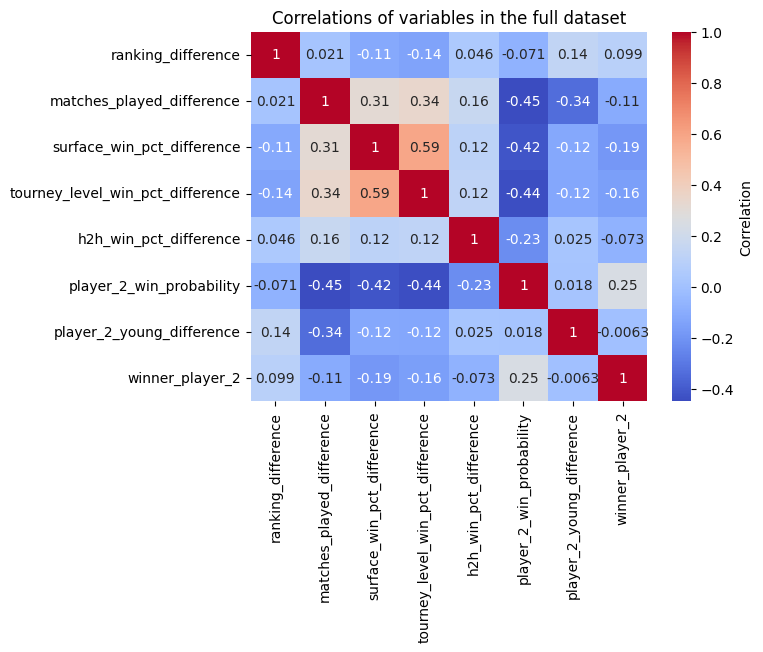

In [84]:
import seaborn as sns

# Determine correlations between variables in the dataset
corr = train.corr()

# Plot the correlations
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'})
ax.set_title("Correlations of variables in the full dataset")
plt.show()

#### Observations on correlation
- there are no really strong correlation (>0.7 or <-0.7) surface and tourney level have a strong correlation of 0.68 to 0.7
- there is a medium strong correlation between surface_win_pct_difference and tourney_level_win_pct_difference

Due to the low number of variables, and their insignificant correlation, its probably not beneficial to remove any variables in order to resolve the problem of multicollinearity.

## Prediction <a name="prediction"></a>

In this section, we apply several different prediction models to determine which one gives us the most accurate results for predicting the outcome of a match.

### Define some helper functions

#### Actual vs predicted plot

In [85]:
def actual_vs_predicted_plot(y_true, y_pred):
  min_value=np.array([y_true.min(), y_pred.min()]).min()
  max_value= min=np.array([y_true.max(), y_pred.max()]).max()
  fig = plt.figure()
  ax = fig.gca()
  ax.scatter(y_true,y_pred, color="blue")
  ax.plot([min_value,max_value], [min_value, max_value], lw=4, color="green")
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  plt.xlim=0
  plt.ylim=0
  plt.show()

#### ROC plot

In [86]:
def plot_ROC(model, X_test, y_test):
  from sklearn.metrics import RocCurveDisplay
  ROC = RocCurveDisplay.from_estimator(model, X_test, y_test, color='green', linewidth=3)
  plt.title('ROC Curve')
  plt.xlabel('False Alarm (1 - Specificity)')
  plt.ylabel('Recall (Sensitivity)')
  plt.show()

#### Plot confusion matrix

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_test, y_pred):

    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Player_2_winner = 0', 'Player_2_winner = 1'],
                yticklabels=['Player_2_winner = 0', 'Player_2_winner = 1'])
    plt.xlabel('Predicted Outcome')
    plt.ylabel('Actual Outcome')
    plt.title('Confusion Matrix')
    plt.show()

#### Plot variable importances

In [88]:
def plot_variable_importance(model, X_train):
  importances = pd.Series(data=model.feature_importances_,
                          index=X_train.columns)
  importances.sort_values().plot(kind='barh', color="#00802F")
  plt.title('Features Importances')

### Create Train and Test data
We will reuse 2  data sets for training each model and then testing (evaluating) the model performance.

In [89]:
X = train.drop("winner_player_2", axis=1)
y = train["winner_player_2"]

In [90]:
X

,ranking_difference,matches_played_difference,surface_win_pct_difference,tourney_level_win_pct_difference,h2h_win_pct_difference,player_2_win_probability,player_2_young_difference
0,0.977,47,0.297,0.466,0.000,0.154,15.200
1,0.994,6,0.333,0.333,0.000,0.438,6.700
2,0.982,28,-0.045,0.024,0.000,0.503,5.900
3,0.861,58,0.667,0.686,0.000,0.261,9.600
4,0.986,35,0.100,0.006,0.000,0.251,16.200
...,...,...,...,...,...,...,...
67543,0.989,290,-0.002,-0.119,0.000,0.167,6.300
67544,0.998,900,0.249,0.319,1.000,0.091,11.300
67545,0.999,-264,0.009,0.095,0.333,0.306,13.000
67546,0.986,1247,0.296,0.168,0.000,0.017,6.300


In [91]:
y

0        0
1        1
2        1
3        0
4        1
        ..
67543    1
67544    0
67545    1
67546    0
67547    0
Name: winner_player_2, Length: 67548, dtype: int64

### Split train and test data
We use a method to split the train and test data 70:30. Note the parameter ```shuffle = False```, which ensures that the temporal order of the data is maintained during the split, reducing the risk of temporal leakage.

In [92]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3
                                                    , random_state = 8
                                                    , shuffle=False
                                                    )
# Split into a 3rd validation set
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                    test_size = 0.5
                                                    , random_state = 8
                                                    , shuffle=False
                                                    )

In [93]:
X_train


,ranking_difference,matches_played_difference,surface_win_pct_difference,tourney_level_win_pct_difference,h2h_win_pct_difference,player_2_win_probability,player_2_young_difference
0,0.977,47,0.297,0.466,0.000,0.154,15.200
1,0.994,6,0.333,0.333,0.000,0.438,6.700
2,0.982,28,-0.045,0.024,0.000,0.503,5.900
3,0.861,58,0.667,0.686,0.000,0.261,9.600
4,0.986,35,0.100,0.006,0.000,0.251,16.200
...,...,...,...,...,...,...,...
47278,0.817,285,0.373,0.500,0.000,0.175,9.000
47279,0.760,16,0.333,0.333,0.000,0.560,5.100
47280,0.760,3,0.000,0.000,0.000,0.568,8.600
47281,0.972,15,0.667,0.467,0.000,0.497,11.700


In [94]:
X_test

,ranking_difference,matches_played_difference,surface_win_pct_difference,tourney_level_win_pct_difference,h2h_win_pct_difference,player_2_win_probability,player_2_young_difference
47283,0.783,-1,1.000,1.000,0.000,0.409,8.600
47284,0.134,15,0.818,0.733,0.000,0.376,3.200
47285,0.183,8,0.400,0.375,0.000,0.527,5.400
47286,0.134,16,0.833,0.750,0.000,0.354,6.800
47287,0.400,1,0.000,0.000,0.000,0.527,3.700
...,...,...,...,...,...,...,...
57410,0.985,-868,-0.139,-0.174,-1.000,0.525,19.400
57411,0.993,-212,-0.005,-0.042,0.000,0.371,15.100
57412,0.986,32,-0.324,0.203,0.000,0.278,7.900
57413,0.998,40,0.196,0.035,-1.000,0.416,12.300


In [95]:
y_train

0        0
1        1
2        1
3        0
4        1
        ..
47278    0
47279    0
47280    0
47281    1
47282    0
Name: winner_player_2, Length: 47283, dtype: int64

In [96]:
y_test

47283    1
47284    0
47285    0
47286    0
47287    0
        ..
57410    0
57411    1
57412    0
57413    0
57414    1
Name: winner_player_2, Length: 10132, dtype: int64

### Model 1: Decision Tree

#### Model Creation
Cross validation and hyperparameter optimisation was done separately - see below

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Instantiate Model
model1_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6, max_features = 4, min_samples_leaf = 8, random_state=1)

# 2. Fit model
model1_tree.fit(X_train, y_train)

# 3. Make prediction
y_pred = model1_tree.predict(X_test)

# 4. Evaluate Model Performance - accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy (test data): %.3f' % acc)

###########
# Run on 26.1.
# (criterion="entropy", max_depth = 6, max_features = 4, min_samples_leaf = 8, random_state=1)#
# Accuracy (test data): 0.665
###########


Accuracy (test data): 0.665


For a Decision Tree model, with 66.5% there is a slightly better accuracy than our benchmark of 65.6%.

#### Evaluate Model Performance

##### Varying the threshold for this model

By default a class probability of > 0.5 determines an upset i.e. player 2 wins!

using .predict_proba() we can get predicted probabilities and try out own tresholds:

In [98]:
# using default threshold, example of probabilities
model1_tree.predict_proba(X_test)

array([[0.89035088, 0.10964912],
       [0.93557833, 0.06442167],
       [0.93557833, 0.06442167],
       ...,
       [0.53649485, 0.46350515],
       [0.63676671, 0.36323329],
       [0.73964497, 0.26035503]])

In [99]:
# Evaluate different thresholds and classification reports pt. 1
print('Classification report with threshold > 0.1:')
y_pred =  (model1_tree.predict_proba(X_test)[:, 1] > 0.1).astype(int)
print(classification_report(y_test, y_pred))


Classification report with threshold > 0.1:
              precision    recall  f1-score   support

           0       0.89      0.10      0.18      6587
           1       0.37      0.98      0.54      3545

    accuracy                           0.41     10132
   macro avg       0.63      0.54      0.36     10132
weighted avg       0.71      0.41      0.30     10132



* This model has much lower accuracy (41%)
* Almost perfect Recall (98% of matches with upsets can be identified)
* Low Precision (Only 37% of predictions are correct)

The threshold of 0.1 is very low, each match with probability of an upset > 10% is flagged as an upset (a quite optimistic model).

In [100]:
# Evaluate different thresholds and classification reports pt. 2
print('Classification report with threshold > 0.4:')
y_pred =  (model1_tree.predict_proba(X_test)[:, 1] > 0.4).astype(int)
print(classification_report(y_test, y_pred))

Classification report with threshold > 0.4:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6587
           1       0.51      0.43      0.47      3545

    accuracy                           0.66     10132
   macro avg       0.62      0.61      0.61     10132
weighted avg       0.65      0.66      0.65     10132



* This model has higher accuracy (66%)
* Lower Recall (only 43% of matches with upsets can be identified)
* Higher Precision (51%% of predictions are correct)

The threshold of 0.4 is stricter, only matches with probability of an upset > 40% are flagged as an upset (a slightly more conservative model).

For our use of predicting outcomes of tennis matches, we would prefer a model with higher precision. The reason is because it may be used by bettors for gambling purposes, and a low precision would entail higher financial risk. 

##### Confusion matrix for threshold set to 0.4

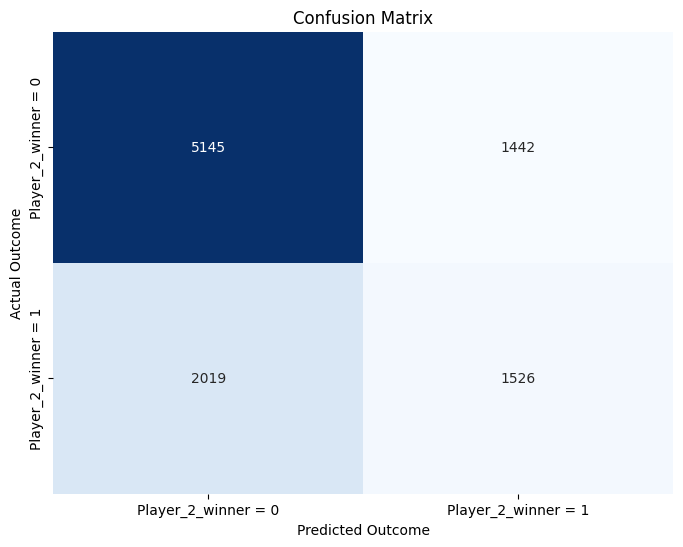

In [101]:
plot_confusion_matrix(y_test, y_pred)

This looks like the best threshold to attain a good balance between true positives (top left quadrant) and true negatives (bottom right quadrant). Also, as we aim to reduce the number of false positives (top right quadrant), its not too bad.

##### DT feature importance

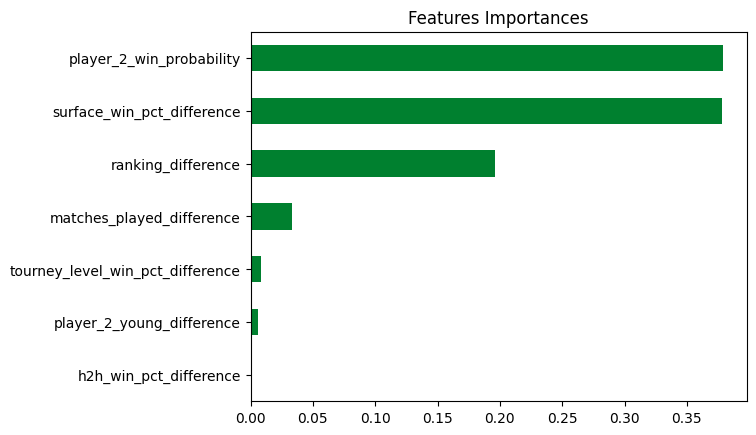

In [102]:
plot_variable_importance(model1_tree, X_train)

The player_2_probability feature is the most important, followed by the surface_win_pct_difference, ranking_difference and matches_played_difference features. Let's keep this in mind when looking at the next model.

##### DT ROC Curve
Visualizing the ROC Curve for the Decision Tree model: a moderate AUC value of 0.67.

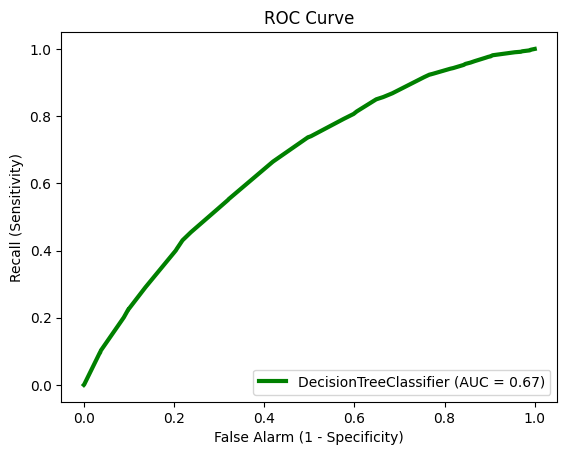

In [103]:
plot_ROC(model1_tree, X_test,y_test)

#### Cross validation and hyperparameter optimisation for Decision Tree

In [ ]:
# Tested 26.1
# Test duration 9s

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import make_scorer

# 0. Setting up TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# 1. Define hyperparameters for GridSearchCV
parameters = {
            'max_depth':range(3, 8),
            'max_features': [2, 4, 5, 6, 7], 
            'min_samples_leaf': [6, 8, 10, 12]
            }

# 2. Define a scoring function for accuracy
acc_score = make_scorer(accuracy_score, greater_is_better=True)

# 3. Define GridSearch CV object
model1_tree_CV = GridSearchCV(model1_tree, parameters, scoring=acc_score, cv=tscv, return_train_score=True, verbose=3) # Apply 5 TimeSeriesSplits to find best hyperparameters

# 4. Fit GridSearch CV object to model
model1_tree_CV_fitted= model1_tree_CV.fit(X_train, y_train)

# 5. Interpret results
print("Best hyperparameters:", model1_tree_CV_fitted.best_params_)
print("Accuracy (trained cv data): %.3f" % model1_tree_CV_fitted.best_score_)

# 6. Evaluation Generalization Performance
y_pred_model1 = model1_tree_CV_fitted.predict(X_test)

# acc = accuracy_score(y_test, y_pred_model1)
print('Accuracy (tested on "unseen" data): %.3f' % acc)

##########
# Tested:
# parameters = {
        # 'max_depth':range(3, 8),
        # 'max_features': [2, 4, 5, 6, 7], 
        # 'min_samples_leaf': [6, 8, 10, 12]
#             }
# Results:
# Best hyperparameters: {'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 8}
# Accuracy (trained cv data): 0.689
# Accuracy (tested on "unseen" data): 0.665
##########



#### Validation of combined train and test data
Use validation dataset (unseen by model) to validate the combined train and test data

In [103]:
# 1.Create a new DT model
tree_combined = DecisionTreeClassifier(criterion="entropy", max_depth = 6, max_features = 4, min_samples_leaf = 8,random_state=1)

# 2. Combine train and test da...taframes
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])

# 3- Fit on the combined train and test datasets
tree_combined.fit(X_combined, y_combined)
y_pred_val_tree = tree_combined.predict(X_val)
acc_val_tree = accuracy_score(y_val, y_pred_val_tree)
print('Accuracy (test data): %.3f' % acc_val_tree)

###########
# Run on 30.1.
# (criterion="entropy", max_depth = 6, max_features = 4, min_samples_leaf = 8, random_state=1)#
# Accuracy (test data): 0.650
###########


Accuracy (test data): 0.650


###  Model 2: Random Forest Model

#### Model creation without CV (after finding best params below)

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Instantiate Model
model2_rf = RandomForestClassifier(criterion="entropy", max_depth = 10, max_features = 2, n_estimators = 200, random_state=1)

# 2. Fit model
model2_rf.fit(X_train, y_train)

# 3. Make prediction
y_pred = model2_rf.predict(X_test)

# 4. Evaluate Model Performance - accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy (test data): %.3f' % acc)

###########
# Run on 31.1.
# (criterion="entropy", max_depth = 10, max_features = 2,  n_estimators = 200, random_state=1)#
# Accuracy (test data): 0.666
###########


Accuracy (test data): 0.666


For a Random Forest model, with 66.6% there is a slightly better accuracy than the Decision Tree's model accuracy of 66.3%.

#### Evaluate Model Performance

##### Varying the threshold for this model

In [105]:
# using default threshold, example of probabilities
model2_rf.predict_proba(X_test)

array([[0.82410013, 0.17589987],
       [0.95319026, 0.04680974],
       [0.92282069, 0.07717931],
       ...,
       [0.51309008, 0.48690992],
       [0.62516414, 0.37483586],
       [0.65532285, 0.34467715]])

In [106]:
# Evaluate different thresholds and classification reports pt. 1
print('Classification report with threshold > 0.1:')
y_pred =  (model2_rf.predict_proba(X_test)[:, 1] > 0.1).astype(int)
print(classification_report(y_test, y_pred))


Classification report with threshold > 0.1:
              precision    recall  f1-score   support

           0       0.92      0.08      0.15      6587
           1       0.37      0.99      0.53      3545

    accuracy                           0.40     10132
   macro avg       0.64      0.53      0.34     10132
weighted avg       0.73      0.40      0.28     10132



* This model has a low accuracy (40%), identical to the same threshold on model for Decision Tree.
* Almost perfect Recall  of 99%, almost identical to the same threshold on model for Decision Tree.
* Low Precision (Only 37% of predictions are correct)

The threshold of 0.1 is very low, each match with probability of an upset > 10% is flagged as an upset (a quite optimistic model).

In [107]:
# Evaluate different thresholds and classification reports pt. 2
print('Classification report with threshold > 0.4:')
y_pred =  (model2_rf.predict_proba(X_test)[:, 1] > 0.4).astype(int)
print(classification_report(y_test, y_pred))

Classification report with threshold > 0.4:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      6587
           1       0.51      0.47      0.49      3545

    accuracy                           0.66     10132
   macro avg       0.62      0.61      0.62     10132
weighted avg       0.65      0.66      0.65     10132



In short: this model with threshold > 0.4 offers better performance (higher accuracy and higher precision) than the threshold > 0.1, but look at the next evaluation with threshold > 0.3.

In [108]:
# Evaluate different thresholds and classification reports pt. 3
print('Classification report with threshold > 0.5:')
y_pred =  (model2_rf.predict_proba(X_test)[:, 1] > 0.5).astype(int)
print(classification_report(y_test, y_pred))

Classification report with threshold > 0.5:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78      6587
           1       0.57      0.20      0.29      3545

    accuracy                           0.67     10132
   macro avg       0.62      0.56      0.54     10132
weighted avg       0.64      0.67      0.61     10132



Compared to the other thresholds:
* This model has higher accuracy (67%)
* Lower recall (only 20% of matches with upsets can be identified)
* Higher precision (57% of predictions are correct)

The threshold of 0.4 is stricter, only matches with probability of an upset > 40% are flagged as an upset (a slightly more conservative model).

In comparison to the Decision Tree model, here we have a slightly higher accuracy as well as a slightly higher precision. However, this comes at the cost of a drastic reduction in the recall. When selecting this model over the other, one needs to keep this in mind.

##### RF feature importance

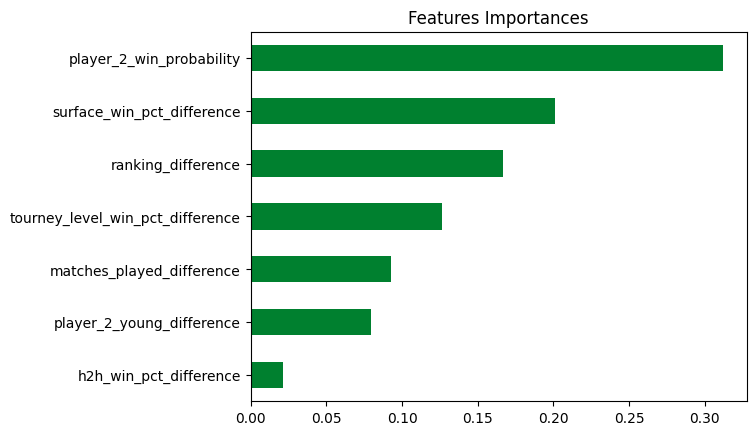

In [109]:
plot_variable_importance(model2_rf, X_train)

The player_2_probability feature is once again the most important, followed by the surface_win_pct_difference and the ranking_difference features. The features importances are more distributed, meaning there are no feature above 0.5 importance like player_2_win_probability in the Decision Tree model.

##### RF ROC Curve
Visualizing the ROC Curve for the Random Forest model: a moderate AUC value of 0.68.

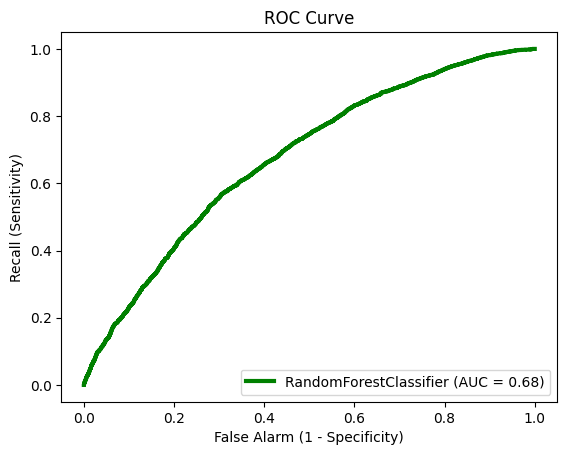

In [110]:
plot_ROC(model2_rf, X_test,y_test)

#### RF cross validation for time series (only run when re-training data or changing the features)

1st attempt (Model 2.1.1 using GridSearchCV and TimeSeriesSplit)

In [ ]:
# Test at 29.1.
# Test duration 30m

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, make_scorer

# 0. Use TimeSeriesSplit instead of train_test_split for CV
tscv = TimeSeriesSplit(n_splits=5)

# 1. Instantiate Model
model2_1_1_rf = RandomForestClassifier(random_state=1)

# 2. Define hyperparameters for GridSearchCV
parameters = {
            'n_estimators': [200, 500, 1000],
            'max_depth': [6, 8, 10],
            'max_features': [2, 4]
            }

# 3. Define GridSearchCV object
acc_score = make_scorer(accuracy_score, greater_is_better=True)
model2_1_1_rf_CV = GridSearchCV(model2_1_1_rf, parameters, cv=tscv, scoring=acc_score, verbose=3)


# 4. Fit GridSearchCV to model data
model2_1_1_rf_CV_fitted = model2_1_1_rf_CV.fit(X_train, y_train) # use this for ROC plot

# 5. Interpret results
print("Best hyperparameters:", model2_1_1_rf_CV_fitted.best_params_)
print("Accuracy (trained cv data): %.3f" % model2_1_1_rf_CV_fitted.best_score_)

# 6. Evaluate Model Performance - accuracy
y_pred_model2_1_1 = model2_1_1_rf_CV.predict(X_test)
model2_1_1_acc = accuracy_score(y_test, y_pred_model2_1_1)
print('Accuracy (test data): %.3f' % model2_1_1_acc)

###########
# Tested
#  parameters = {
            # 'n_estimators': [200, 500, 1000],
            # 'max_depth': [6, 8, 10],
            # 'max_features': [2, 4]
#           }
# Results
# Best hyperparameters: {'max_depth': 10, 'max_features': 2, 'n_estimators': 200}
# Accuracy (trained cv data): 0.692
# Accuracy (test data): 0.668
###########


#### Validation of combined train and test data
Use validation dataset (unseen by model) to validate the combined train and test data

In [111]:
# 1.Create a new RF model
rf_combined = RandomForestClassifier(criterion="entropy", max_depth = 10, max_features = 2, n_estimators = 200, random_state=1)

# 2. Fit on the combined train and test datasets
rf_combined.fit(X_combined, y_combined)
y_pred_val_rf = rf_combined.predict(X_val)
acc_val_rf = accuracy_score(y_val, y_pred_val_rf)
print('Accuracy (test data): %.3f' % acc_val_rf)

###########
# Run on 30.1.
# (criterion="entropy", max_depth = 10, max_features = 2, n_estimators = 200, random_state=1)
# Accuracy (test data): 0.656
###########


Accuracy (test data): 0.656


2nd Attempt (Model 2.1.2) - using RandomizedSearchCV

In [ ]:
''' Only run when exploring other CV type
# Test at 3.1 
# Test duration 18m

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, make_scorer

# 0. Use TimeSeriesSplit instead of train_test_split for CV
tscv = TimeSeriesSplit(n_splits=5)

# 1. Instantiate Model
model2_1_2_rf = RandomForestClassifier(random_state=1)

# 2. Define hyperparameters for RandomizedSearchCV
parameters = {
            'n_estimators': [500, 700, 1000],
            # 'max_features': [4, 8, 16],
            'max_depth': [5, 6, 7, 8, 9, 10],
            # 'min_samples_split': [2, 3, 5, 7], 
            # 'min_samples_leaf': [1, 2, 4]
            }

# 3. Define RandomizedSearchCV object
acc_score = make_scorer(accuracy_score, greater_is_better=True)
model2_1_2_rf_CV = RandomizedSearchCV(model2_1_2_rf, parameters, cv=tscv, scoring=acc_score, return_train_score=True, verbose=3)


# 4. Fit RandomizedSearchCV to model data
model2_1_2_rf_CV_fitted = model2_1_2_rf_CV.fit(X_train, y_train) # use this for ROC plot

# 5. Interpret results
print("Best hyperparameters:", model2_1_2_rf_CV_fitted.best_params_)
print("Accuracy (trained cv data): %.3f" % model2_1_2_rf_CV_fitted.best_score_)

# -. Get prediction probabilities
# y_pred_model2_1_1.predict_proba(X_test)

# 6. Evaluate Model Performance - accuracy
y_pred_model2_1_2 = model2_1_2_rf_CV.predict(X_test)
model2_1_2_acc = accuracy_score(y_test, y_pred_model2_1_2)
print('Accuracy (test data): %.3f' % model2_1_2_acc)

# -. Print classification report
# y_pred =  (model2_1_1_rf.predict_proba(X_test)[:, 1] > 0.1).astype(int)
# print(classification_report(y_test, y_pred_model2_1_1))

###########
# Tested
#  parameters = {
#               'n_estimators': [500, 700, 1000],
                # 'max_depth': [5, 10, 20],
#               'min_samples_leaf': [1, 2, 4]
#                }
# Results
# Best hyperparameters: {'n_estimators': 700, 'min_samples_leaf': 1, 'max_depth': 5}
# Accuracy (trained cv data): 0.683
# Accuracy (test data): 0.651
###########
'''

Optimise the random state of the test data, as we assume the data are not distributed equally.

In [ ]:
''' Run as one-off 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_state_value = 1
results_random_state_comparison = []
for random_state in range(1, 21):

  # 1. Instantiate model
  model2_rf  = RandomForestClassifier(random_state=1)

  # 2. Fit Model to Data
  reg = model2_rf.fit(X_train,y_train)

  # 3. Make prediction
  y_pred = model2_rf.predict(X_test)

  # 4. Evaluate Model Performance - accuracy
  acc = accuracy_score(y_test, y_pred)
  #print('Accuracy: %.3f' % acc)

  results_random_state_comparison.append((random_state_value, acc))
  random_state_value = random_state_value+1

df_random_state_results = pd.DataFrame(results_random_state_comparison, columns=['Random State', 'Accuracy'])
print(df_random_state_results)

# Result:
# Top 2 random_states
# randam_state 8 -> Accuracy 0.658
# random_state 10, 17, 18, etc. -> Accuracy 0.656

# Conclusion: Only random_state 8 will be used from now on as a parameter for the train_test_split() method. All previous models are adapted to 
#             use random_state 8.
'''

### Model 3: Gradient Booster Tree Model

#### Model creation without CV (after finding best params below)

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Instantiate Model
model3_gb= GradientBoostingClassifier(criterion="squared_error", max_depth = 6, max_features = 2, n_estimators = 100, random_state=1)

# 2. Fit model
model3_gb.fit(X_train, y_train)

# 3. Make prediction
y_pred = model3_gb.predict(X_test)

# 4. Evaluate Model Performance - accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy (test data): %.3f' % acc)

###########
# Run on 29.1.
# (criterion="entropy", max_depth = 6, max_features = 2, n_estimators = 100, random_state=1)#
# Accuracy (test data): 0.667
###########


Accuracy (test data): 0.667


For a Gradient Booster model, with 66.7% there is a slightly better accuracy than the Random Forest's model accuracy of 66.7%.

#### Evaluate Model Performance

##### Varying the threshold for this model

In [105]:
# using default threshold, example of probabilities
model3_gb.predict_proba(X_test)

array([[0.81781079, 0.18218921],
       [0.95913463, 0.04086537],
       [0.93271358, 0.06728642],
       ...,
       [0.48422049, 0.51577951],
       [0.62359821, 0.37640179],
       [0.57633447, 0.42366553]])

In [106]:
# Evaluate different thresholds and classification reports pt. 1
print('Classification report with threshold > 0.1:')
y_pred =  (model3_gb.predict_proba(X_test)[:, 1] > 0.1).astype(int)
print(classification_report(y_test, y_pred))

Classification report with threshold > 0.1:
              precision    recall  f1-score   support

           0       0.90      0.10      0.18      6587
           1       0.37      0.98      0.54      3545

    accuracy                           0.41     10132
   macro avg       0.63      0.54      0.36     10132
weighted avg       0.71      0.41      0.30     10132



* This model has a low accuracy (41%), but slightly higher than the same threshold on models for Decision Tree and Random Forest.
* Almost perfect recall of 98%, similar as on models for Decision Tree and Random Forest.
* Low precision (Only 37% of predictions are correct)

The threshold of 0.1 is very low, each match with probability of an upset > 10% is flagged as an upset (a quite optimistic model).

In [107]:
# Evaluate different thresholds and classification reports pt. 2
print('Classification report with threshold > 0.4:')
y_pred =  (model3_gb.predict_proba(X_test)[:, 1] > 0.4).astype(int)
print(classification_report(y_test, y_pred))

Classification report with threshold > 0.4:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75      6587
           1       0.52      0.47      0.50      3545

    accuracy                           0.66     10132
   macro avg       0.62      0.62      0.62     10132
weighted avg       0.66      0.66      0.66     10132



In [108]:
# Evaluate different thresholds and classification reports pt. 3
print('Classification report with threshold > 0.5:')
y_pred =  (model3_gb.predict_proba(X_test)[:, 1] > 0.5).astype(int)
print(classification_report(y_test, y_pred))

Classification report with threshold > 0.5:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78      6587
           1       0.56      0.23      0.32      3545

    accuracy                           0.67     10132
   macro avg       0.62      0.57      0.55     10132
weighted avg       0.64      0.67      0.62     10132



Compared to the other thresholds:
* This model has a higher accuracy (67%)
* Lower recall (only 23% of matches with upsets can be identified)
* Higher precision (56% of predictions are correct)

The threshold of 0.5 is even more strict, only matches with probability of an upset > 50% are flagged as an upset (a slightly more conservative model). In fact, this is the default threshold for this algorithm.

In comparison to the Random Forest model, here we have almost the same accuracy, but a slightly lower precision. The recall is on the lower side, but not as low as for the Random Forest model. When selecting this model over the other, one needs to keep these evaluations in mind.

##### GB feature importance

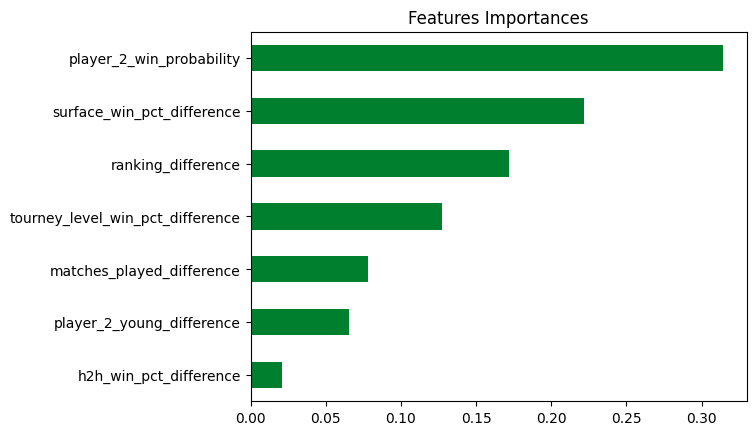

In [109]:
plot_variable_importance(model3_gb, X_train)

Similiar to the Random Forest model, the Gradient Booster model  also spreads out the feature importance more, and marks the features in the same order of importance.

##### GB ROC Curve
Visualizing the ROC Curve for the Gradient Booster model: a moderate AUC value of 0.67.

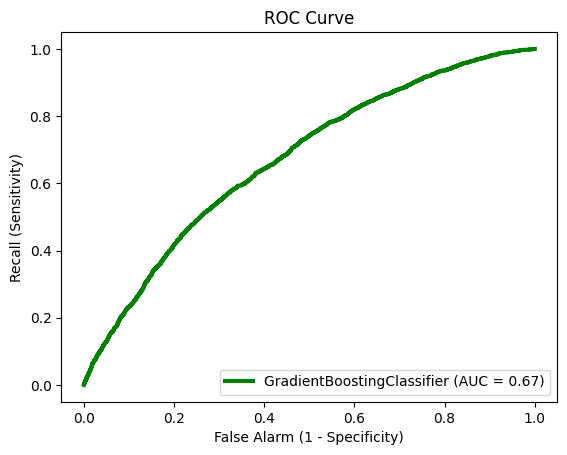

In [119]:
plot_ROC(model3_gb, X_test,y_test)

### GB cross validation for time series (only run when re-training data or changing the features)

1st attempt (Model 3.1.1 using GridSearchCV and TimeSeriesSplit)


In [ ]:
# Test at 29.1.
# Test duration 41m 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, make_scorer

# 0. Use TimeSeriesSplit instead of train_test_split for CV
tscv = TimeSeriesSplit(n_splits=5)

# 1. Instantiate Model
model3_1_1_gb = GradientBoostingClassifier(random_state=1)

# 2. Define hyperparameters for GridSearchCV
parameters = {
            'n_estimators': [100, 200, 500],
            'max_depth': [6, 7, 8 ],
            'max_features': [2, 4, 7], 
            # 'min_samples_split': [3, 5, 7], 
            # 'min_samples_leaf': [1, 10, 20, 50]
            }

# 3. Define GridSearchCV object
acc_score = make_scorer(accuracy_score, greater_is_better=True)
model3_1_1_gb_CV = GridSearchCV(model3_1_1_gb, parameters, cv=tscv, scoring=acc_score, verbose=3)


# 4. Fit GridSearchCV to model data
model3_1_1_gb_CV_fitted = model3_1_1_gb_CV.fit(X_train, y_train) # use this for ROC plot

# 5. Interpret results
print("Best hyperparameters:", model3_1_1_gb_CV_fitted.best_params_)
print("Accuracy (trained cv data): %.3f" % model3_1_1_gb_CV_fitted.best_score_)

# 6. Evaluate Model Performance - accuracy
y_pred_model3_1_1 = model3_1_1_gb_CV.predict(X_test)
model3_1_1_acc = accuracy_score(y_test, y_pred_model3_1_1)
print('Accuracy (test data): %.3f' % model3_1_1_acc)

###########
# Tested
#  parameters = {
            # 'n_estimators': [500, 1000],
            # 'max_depth': [5, 10],
            # 'min_samples_split': [3, 5, 7]
#           }
# Results
# Best hyperparameters: {'max_depth': 6, 'max_features': 2, 'n_estimators': 100}
# Accuracy (trained cv data): 0.685
# Accuracy (test data): 0.667
###########


2nd attempt (Model 3.1.2)


In [ ]:
''' Only run when exploring other CV type
# Test at 3.1.
# Test duration 83m

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score

# 0. Use TimeSeriesSplit instead of train_test_split for CV
tscv = TimeSeriesSplit(n_splits=5)

# 1. Instantiate Model
model3_1_2_gb = GradientBoostingClassifier(random_state=1)

# 2. Define hyperparameters for RandomizedSearchCV
parameters = {
            'n_estimators': [100, 200, 500],
            # 'max_features': [4, 8, 16],
            'max_depth': [10, 20, 50],
            # 'min_samples_split': [3, 5, 7], 
            # 'min_samples_leaf': [1, 10, 20, 50]
            }

# 3. Define RandomizedSearchCV object
acc_score = make_scorer(accuracy_score, greater_is_better=True)
model3_1_2_gb_CV = RandomizedSearchCV(model3_1_2_gb, parameters, cv=tscv, scoring=acc_score, verbose=3)


# 4. Fit RandomizedSearchCV to model data
model3_1_2_gb_CV_fitted = model3_1_2_gb_CV.fit(X_train, y_train) # use this for ROC plot

# 5. Interpret results
print("Best hyperparameters:", model3_1_2_gb_CV_fitted.best_params_)
print("Accuracy (trained cv data): %.3f" % model3_1_2_gb_CV_fitted.best_score_)

# -. Get prediction probabilities
# y_pred_model2_1_1.predict_proba(X_test)

# 6. Evaluate Model Performance - accuracy
y_pred_model3_1_2 = model3_1_2_gb_CV.predict(X_test)
model3_1_2_acc = accuracy_score(y_test, y_pred_model3_1_2)
print('Accuracy: %.3f' % model3_1_2_acc)

# -. Print classification report
# y_pred =  (model2_1_1_rf.predict_proba(X_test)[:, 1] > 0.1).astype(int)
# print(classification_report(y_test, y_pred_model2_1_1))

###########
# Tested
#  parameters = {
#               'n_estimators': [500, 700, 1000],
                # 'max_depth': [5, 10, 20],
#               'min_samples_leaf': [1, 2, 4]
#                }
# Results
# Best hyperparameters: {'n_estimators': 500, 'min_samples_leaf': 2, 'max_depth': 5}
# Accuracy (trained cv data): 0.666
# Accuracy (test data): 0.646
###########
'''

### Validation of combined train and test data
Use validation dataset (unseen by model) to validate the combined train and test data

In [120]:
# 1.Create a new GB model
gb_combined = GradientBoostingClassifier(criterion="squared_error", max_depth = 6, max_features = 2, n_estimators = 100, random_state=1)

# 2. Fit on the combined train and test datasetgb_combined.fit(X_combined, y_combined)
gb_combined.fit(X_combined, y_combined)
y_pred_val_gb = gb_combined.predict(X_val)
acc_val_gb = accuracy_score(y_val, y_pred_val_gb)
print('Accuracy (test data): %.3f' % acc_val_gb)

###########
# Run on 30.1.
# (criterion="squared_error", max_depth = 6, max_features = 2, n_estimators = 100, random_state=1)
# Accuracy (test data): 0.653
###########

Accuracy (test data): 0.653


### Model 4: XGBoost Model

#### Model 4.1.1: XGBoost model


In [ ]:
# Note: run in terminal:
# pip install xgboost

In [125]:
# 1. Import Model libraries and functions
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# 2. Instantiate model
model4_XGBoostReg  = XGBClassifier(learning_rate = 0.01, max_depth = 4, n_estimators = 500)

# 3. Fit model to data
model4_XGBoostReg_fitted = model4_XGBoostReg.fit(X_train,y_train)

# 4. Evaluate Model Performance - accuracy
y_pred_model4 = model4_XGBoostReg_fitted.predict(X_test)
model4_acc = accuracy_score(y_test, y_pred_model4)
print('Accuracy (test data): %.3f' % model4_acc)

###########
# Tested
# parameters: learning_rate = 0.01, max_depth = 4, n_estimators = 500
# Results
# Accuracy (test data): 0.669
###########

Accuracy (test data): 0.669


#### Model 4.1.2: XGBoost model with RandomizedSearchCV and hyperparameter tuning


In [ ]:
''' Only run when exploring other CV type
# Test at 3.1.
# Test duration 5m

# 1. Import Model libraries and functions
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

# 0. Use TimeSeriesSplit instead of train_test_split for CV
tscv = TimeSeriesSplit(n_splits=5)

# 1. Instantiate Model
model4_1_2_xgb = XGBClassifier(random_state=1)

# 2. Define hyperparameters for RandomizedSearchCV
parameters =  {'n_estimators': [100, 200, 500],
              'max_depth': range(8, 12),
#              'learning_rate': [0.1],
#              'colsample_bytree': [0.6, 0.8, 1.0],
#              'subsample': [0.6, 0.8, 1.0],
#              'reg_alpha': [0.01, 0.1, 1],
#               'reg_lambda': [0.01, 0.1, 1]
              }

# 3. Define RandomizedSearchCV object
acc_score = make_scorer(accuracy_score, greater_is_better=True)
model4_1_2_xgb_CV = RandomizedSearchCV(model4_1_2_xgb, 
                                       param_distributions = parameters, 
                                       cv=tscv, 
                                       # n_iter = 150,
                                       scoring=acc_score, 
                                       n_jobs=1,
                                       verbose=3,
                                       # return_train_score=True,
                                       random_state=8
                                       )


# 4. Fit RandomizedSearchCV to model data
model4_1_2_xgb_CV_fitted = model4_1_2_xgb_CV.fit(X_train, y_train) # use this for ROC plot

# 5. Interpret results
print("Best hyperparameters:", model4_1_2_xgb_CV_fitted.best_params_)
print("Accuracy (trained cv data): %.3f" % model4_1_2_xgb_CV_fitted.best_score_)

# -. Get prediction probabilities
# y_pred_model2_1_1.predict_proba(X_test)

# 6. Evaluate Model Performance - accuracy
y_pred_model4_1_2 = model4_1_2_xgb_CV.predict(X_test)
model4_1_2_acc = accuracy_score(y_test, y_pred_model4_1_2)
print('Accuracy (test data): %.3f' % model4_1_2_acc)

# -. Print classification report
# y_pred =  (model2_1_1_rf.predict_proba(X_test)[:, 1] > 0.1).astype(int)
# print(classification_report(y_test, y_pred_model2_1_1))

###########
# Tested
#  parameters = {'n_estimators': [50, 100, 400],
#               'max_depth': [3, 5,7],
#               'learning_rate': [0.1],
#               'colsample_bytree': [0.6, 0.8, 1.0],
#               'subsample': [0.6, 0.8, 1.0],
#               'reg_alpha': [0.01, 0.1, 1],
#                # 'reg_lambda': [0.01, 0.1, 1]
#               }
# Results
# Best hyperparameters: {'subsample': 1.0, 'reg_alpha': 0.01, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
# Accuracy (trained cv data): 0.684
# Accuracy (test data): 0.653
###########
'''

#### Model 4.1.3: XGBoost model with GridSearchCV and hyperparameter tuning


In [124]:
# Test at 2.2.
# Test duration 38m

# 1. Import Model libraries and functions
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# 0. Use TimeSeriesSplit instead of train_test_split for CV
tscv = TimeSeriesSplit(n_splits=5)

# 1. Instantiate Model
model4_1_3_xgb = XGBClassifier(random_state=1)

# 2. Define hyperparameters for GridSearchCV
parameters =  {'n_estimators': [100, 200, 500],
                'max_depth': [4, 6, 8],
                'learning_rate': [0.01, 0.05, 0.1],
              # 'colsample_bytree': [0.6, 0.8],
              # 'subsample': [0.6, 0.8,],
              # 'reg_alpha': [0.1, 1],
              # 'reg_lambda': [0.1, 1]
              }

# 3. Define GridSearchCV object
acc_score = make_scorer(accuracy_score, greater_is_better=True)
model4_1_3_xgb_CV = GridSearchCV(model4_1_3_xgb, 
                                       param_grid = parameters, 
                                       cv=tscv, 
                                       scoring=acc_score, 
                                       n_jobs=1,
                                       verbose=3,
                                       # return_train_score=True
                                       )


# 4. Fit GridSearchCV to model data
model4_1_3_xgb_CV_fitted = model4_1_3_xgb_CV.fit(X_train, y_train) # use this for ROC plot

# 5. Interpret results
print("Best hyperparameters:", model4_1_3_xgb_CV_fitted.best_params_)
print("Accuracy (trained cv data): %.3f" % model4_1_3_xgb_CV_fitted.best_score_)

# -. Get prediction probabilities
# y_pred_model2_1_1.predict_proba(X_test)

# 6. Evaluate Model Performance - accuracy
y_pred_model4_1_3 = model4_1_3_xgb_CV.predict(X_test)
model4_1_3_acc = accuracy_score(y_test, y_pred_model4_1_3)
print('Accuracy (test data): %.3f' % model4_1_3_acc)

# -. Print classification report
# y_pred =  (model2_1_1_rf.predict_proba(X_test)[:, 1] > 0.1).astype(int)
# print(classification_report(y_test, y_pred_model2_1_1))

###########
# Tested
#  parameters = {'n_estimators': [100, 200, 500],
              #   'max_depth': [4, 6, 8],
              #   'learning_rate': [0.01, 0.05, 0.1],
              # # 'colsample_bytree': [0.6, 0.8],
              # # 'subsample': [0.6, 0.8,],
              # # 'reg_alpha': [0.1, 1],
              # # 'reg_lambda': [0.1, 1]
            #  }
# Results
# Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
# Accuracy (trained cv data): 0.691
# Accuracy (test data): 0.669
###########

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.673 total time=   0.4s


[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.682 total time=   0.7s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.701 total time=   6.7s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.704 total time=   8.7s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.690 total time=   9.9s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.672 total time=  14.6s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.683 total time=  17.4s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.704 total time=  13.5s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.706 total time=   3.6s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.691 total time=   2.9s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=0.674 total time=   1.8s
[CV 2/5] END learning_rate=0.01, max_dep

## Examples of Predictions <a name="examples"></a>
We want to demonstrate a few examples where the best model predicted the upset correctly in the unseen data ("test"), in other words, predicted that the lower ranked player will win.

In [110]:
# Take the GB model with a threshold of 0.5 as the best performing model, and assign it to a series of "player 2 wins" true or false values
gb_pred = (model3_gb.predict_proba(X_test)[:, 1] > 0.5).astype(int)
gb_pred

array([0, 0, 0, ..., 1, 0, 0])

In [111]:
# Confrim the length of the dataset for predictions
len(gb_pred)

10132

In [112]:
# Add the predictions to the dataset with all features, and add a feature which represent whether lower ranked player wins or not
# The predictions come from the "test" dataset, so should represent 15% of the ca. 70'000 total rows
to_be_predicted = matches_features_df.loc[y_test.index].copy()
to_be_predicted['prediction'] = gb_pred
to_be_predicted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10132 entries, 47283 to 57414
Data columns (total 58 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   tourney_id                                 10132 non-null  object        
 1   tourney_name                               10132 non-null  object        
 2   surface                                    10132 non-null  object        
 3   draw_size                                  10132 non-null  int64         
 4   tourney_level                              10132 non-null  object        
 5   tourney_date                               10132 non-null  int64         
 6   match_num                                  10132 non-null  int64         
 7   score                                      10132 non-null  object        
 8   best_of                                    10132 non-null  int64         
 9   round             

In [113]:
# Simulate encoding on the dataset by adding a "player 2 wins" feature
to_be_predicted['player_2_wins'] = (to_be_predicted['winner'] == 'player_2').astype(int)

In [114]:
# The benchmark has actually increased to almost 67% with the smaller dataset
to_be_predicted['player_2_wins'].value_counts(normalize=True)

player_2_wins
0   0.669
1   0.331
Name: proportion, dtype: float64

In [115]:
# Confirm that the dataset has 2 extra features now added to the end
to_be_predicted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10132 entries, 47283 to 57414
Data columns (total 59 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   tourney_id                                 10132 non-null  object        
 1   tourney_name                               10132 non-null  object        
 2   surface                                    10132 non-null  object        
 3   draw_size                                  10132 non-null  int64         
 4   tourney_level                              10132 non-null  object        
 5   tourney_date                               10132 non-null  int64         
 6   match_num                                  10132 non-null  int64         
 7   score                                      10132 non-null  object        
 8   best_of                                    10132 non-null  int64         
 9   round             

In [116]:
# This number represents the proportion of expected (0) vs. upset (1) results the model predicts on this data
to_be_predicted['prediction'].value_counts(normalize=True)

prediction
0   0.858
1   0.142
Name: proportion, dtype: float64

In [117]:
# This number represents how the model's prediction of expected (0) vs. upset (1) results compares to the actual results
to_be_predicted.loc[:, 'pred_correct'] = to_be_predicted['player_2_wins'] == to_be_predicted['prediction']
to_be_predicted['pred_correct'].value_counts(normalize=True)

pred_correct
True    0.620
False   0.380
Name: proportion, dtype: float64

In [118]:
to_be_predicted.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,player_1_name,player_2_name,player_1_id,player_2_id,player_1_seed,player_2_seed,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_ioc,player_2_ioc,player_1_age,player_2_age,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,winner,tourney_date_dt,tourney_date_dt_preceding_monday,tourney_year,ranking_difference,player_1_cum_match_count,player_2_cum_match_count,player_1_surface_cum_match_count,player_2_surface_cum_match_count,player_1_surface_cum_win_percentage,player_2_surface_cum_win_percentage,player_1_tourney_level_cum_match_count,player_2_tourney_level_cum_match_count,player_1_tourney_level_cum_win_percentage,player_2_tourney_level_cum_win_percentage,matches_played_difference,surface_win_pct_difference,tourney_level_win_pct_difference,player_1_h2h_win_pct,player_2_h2h_win_pct,h2h_win_pct_difference,player_1_elo_rating,player_2_elo_rating,player_1_win_probability,player_2_win_probability,player_2_young_difference,prediction,player_2_wins,pred_correct
47283,2015-580,Australian Open,Hard,128,G,20150119,79,6-3 6-4 6-2,5,R64,118.000,Santiago Giraldo,Steve Johnson,105053,105449,30.000,NaN,NaN,NaN,R,R,188.000,188.000,COL,USA,27.100,25.000,32.000,38.000,1175.000,993.000,player_2,2015-01-19,2015-01-19,2015,0.998,273,71,128,54,0.414,0.444,32,14,0.281,0.286,202,-0.030,-0.004,0.000,0.000,0.000,1697.952,1730.545,0.453,0.547,10.500,0,1,False
47284,2015-580,Australian Open,Hard,128,G,20150119,80,4-6 7-5 6-2 7-6(0),5,R64,167.000,Kei Nishikori,Ivan Dodig,105453,104471,5.000,NaN,NaN,NaN,R,R,178.000,183.000,JPN,CRO,25.000,30.000,5.000,86.000,5025.000,610.000,player_1,2015-01-19,2015-01-19,2015,0.976,300,215,212,140,0.651,0.493,59,32,0.644,0.438,85,0.158,0.207,0.750,0.250,0.500,2221.834,1720.656,0.947,0.053,15.500,0,0,True
47285,2015-580,Australian Open,Hard,128,G,20150119,81,7-6(0) 6-2 6-2,5,R64,123.000,Tomas Berdych,Jurgen Melzer,104607,103781,7.000,NaN,NaN,Q,R,L,196.000,183.000,CZE,AUT,29.300,33.600,7.000,108.000,4660.000,514.000,player_1,2015-01-19,2015-01-19,2015,0.970,754,652,462,334,0.647,0.515,149,106,0.698,0.538,102,0.132,0.160,0.600,0.400,0.200,2085.486,1699.286,0.902,0.098,19.100,0,0,True
47286,2015-580,Australian Open,Hard,128,G,20150119,82,6-4 4-6 6-4 6-0,5,R64,148.000,Leonardo Mayer,Viktor Troicki,104919,104678,26.000,NaN,NaN,NaN,R,R,188.000,193.000,ARG,SRB,27.600,28.900,26.000,54.000,1389.000,826.000,player_2,2015-01-19,2015-01-19,2015,0.992,196,360,89,224,0.416,0.554,43,52,0.512,0.558,-164,-0.138,-0.046,0.000,0.000,0.000,1801.669,1941.074,0.309,0.691,14.400,0,1,False
47287,2015-580,Australian Open,Hard,128,G,20150119,83,6-7(5) 6-4 7-6(6) 7-6(5),5,R64,185.000,Philipp Kohlschreiber,Bernard Tomic,104259,106071,22.000,NaN,NaN,NaN,R,R,178.000,193.000,GER,AUS,31.200,22.200,24.000,66.000,1415.000,737.000,player_2,2015-01-19,2015-01-19,2015,0.987,593,185,302,124,0.540,0.532,99,43,0.586,0.535,408,0.007,0.051,0.500,0.500,0.000,1834.447,1819.054,0.522,0.478,7.700,0,1,False


In [119]:
to_be_predicted[['winner'
                , 'player_2_wins'
                , 'prediction'
                , 'pred_correct'
                ]]

,winner,player_2_wins,prediction,pred_correct
47283,player_2,1,0,False
47284,player_1,0,0,True
47285,player_1,0,0,True
47286,player_2,1,0,False
47287,player_2,1,0,False
...,...,...,...,...
57410,player_1,0,0,True
57411,player_1,0,0,True
57412,player_2,1,1,True
57413,player_1,0,0,True


Observations:
- Correct predictions of upsets are like row 57412: player 2 actually wins and the prediction is correct.
- Incorrect predictions of upsets are like row 47287: player 2 actually wins but the prediction is incorrect.

In [120]:
# Set the columns for presenting results of predictions
columns_predictions = ['tourney_name'
                    , 'tourney_year'
                    , 'player_1_name'
                    , 'player_1_rank'
                    , 'player_2_name'
                    , 'player_2_rank'
                    , 'winner'
                    , 'ranking_difference'
                    , 'matches_played_difference'
                    , 'tourney_level_win_pct_difference'
                    , 'surface_win_pct_difference'
                    , 'h2h_win_pct_difference'
                    , 'player_2_win_probability'
                    , 'player_2_young_difference']

### Examples from correctly predicted upsets
Get some examples of the Big 4 in men's tennis getting defeated by lower-ranked players, where the model correctly predicts it.

In [121]:
# correctly predicted upsets (player 2 wins)
mask_correct_upset = (to_be_predicted['pred_correct'] & to_be_predicted['player_2_wins'])

In [122]:
to_be_predicted[mask_correct_upset][columns_predictions]

,tourney_name,tourney_year,player_1_name,player_1_rank,player_2_name,player_2_rank,winner,ranking_difference,matches_played_difference,tourney_level_win_pct_difference,surface_win_pct_difference,h2h_win_pct_difference,player_2_win_probability,player_2_young_difference
47294,Australian Open,2015,Martin Klizan,34.000,Joao Sousa,55.000,player_2,0.994,20,0.071,0.010,0.000,0.242,11.300
47370,Montpellier,2015,Andreas Beck,110.000,Edouard Roger Vasselin,127.000,player_2,0.995,-85,-0.026,-0.013,0.000,0.657,16.600
47372,Montpellier,2015,Jarkko Nieminen,66.000,Steve Darcis,125.000,player_2,0.982,570,0.043,0.096,1.000,0.454,16.300
47454,Rotterdam,2015,Lukas Rosol,29.000,Simone Bolelli,50.000,player_2,0.994,-38,0.075,0.019,0.000,0.538,14.800
47460,Rotterdam,2015,Grigor Dimitrov,11.000,Gilles Muller,37.000,player_2,0.992,-25,0.119,0.050,1.000,0.172,17.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57394,s Hertogenbosch,2018,Aljaz Bedene,70.000,Marius Copil,97.000,player_2,0.992,81,0.081,0.075,1.000,0.220,13.100
57396,s Hertogenbosch,2018,Andreas Seppi,49.000,Mackenzie Mcdonald,110.000,player_2,0.982,695,0.502,0.578,0.000,0.141,8.600
57397,s Hertogenbosch,2018,Vasek Pospisil,88.000,Alex Bolt,176.000,player_2,0.974,216,0.446,0.400,0.000,0.252,10.900
57398,s Hertogenbosch,2018,Guillermo Garcia Lopez,68.000,Jeremy Chardy,72.000,player_2,0.999,145,-0.014,0.040,0.000,0.616,16.800


In [123]:
# To view the full list in Excel, uncomment the line below (needs python package "openpyxl")
# to_be_predicted[mask_correct_upset][columns_predictions].to_excel("matches_predict_correct_upset.xlsx")

In [124]:
# take 4 examples from the correctly predicted upsets and present these
# index 48797, 51014, 54484, 53174
examples_correct_upset_pred = to_be_predicted.filter(items=[48797, 51014, 54484, 53174], axis=0)[columns_predictions]
examples_correct_upset_pred

,tourney_name,tourney_year,player_1_name,player_1_rank,player_2_name,player_2_rank,winner,ranking_difference,matches_played_difference,tourney_level_win_pct_difference,surface_win_pct_difference,h2h_win_pct_difference,player_2_win_probability,player_2_young_difference
48797,Wimbledon,2015,Rafael Nadal,10.000,Dustin Brown,102.000,player_2,0.972,805,0.593,0.392,-1.000,0.025,16.000
51014,Monte Carlo Masters,2016,Novak Djokovic,1.000,Jiri Vesely,55.000,player_2,0.984,759,0.514,0.342,0.000,0.003,8.200
54484,Stuttgart,2017,Roger Federer,5.000,Tommy Haas,302.000,player_2,0.911,595,0.180,0.223,0.625,0.016,24.600
53174,Australian Open,2017,Andy Murray,1.000,Mischa Zverev,50.000,player_2,0.985,608,0.497,0.349,1.000,0.016,14.900


### Examples from incorrectly predicted upsets
Here are some examples of the Big 4 in men's tennis defeating the by lower-ranked opponent, but the model incorrectly predicted an upset it

In [125]:
# failed predicted upsets (player 1 wins but model incorrectly predicted a player 2 win)
mask_fail_upset = (~to_be_predicted['pred_correct'] & ~to_be_predicted['player_2_wins'])

In [126]:
to_be_predicted[mask_fail_upset][columns_predictions]

,tourney_name,tourney_year,player_1_name,player_1_rank,player_2_name,player_2_rank,winner,ranking_difference,matches_played_difference,tourney_level_win_pct_difference,surface_win_pct_difference,h2h_win_pct_difference,player_2_win_probability,player_2_young_difference
47309,Australian Open,2015,Tomas Berdych,7.000,Viktor Troicki,54.000,player_1,0.986,394,0.134,0.092,0.667,0.314,14.400
47326,Australian Open,2015,Stan Wawrinka,4.000,Kei Nishikori,5.000,player_1,1.000,262,0.037,-0.042,0.333,0.664,10.500
47329,Australian Open,2015,Novak Djokovic,1.000,Stan Wawrinka,4.000,player_1,0.999,190,0.148,0.213,0.684,0.107,15.300
47330,Australian Open,2015,Andy Murray,6.000,Tomas Berdych,7.000,player_1,1.000,-116,0.102,0.130,-0.200,0.322,14.800
47331,Australian Open,2015,Novak Djokovic,1.000,Andy Murray,6.000,player_1,0.998,114,0.040,0.048,0.304,0.201,13.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57359,Roland Garros,2018,Rafael Nadal,1.000,Dominic Thiem,8.000,player_1,0.998,771,0.157,0.172,0.333,0.159,10.200
57374,Stuttgart,2018,Tomas Berdych,19.000,Benoit Paire,47.000,player_1,0.992,608,0.176,0.202,1.000,0.385,14.500
57387,s Hertogenbosch,2018,Evgeny Donskoy,76.000,Franko Skugor,350.000,player_1,0.918,110,0.029,0.273,0.000,0.292,16.200
57388,s Hertogenbosch,2018,Malek Jaziri,61.000,Max Purcell,214.000,player_1,0.954,185,0.410,0.318,0.000,0.201,5.600


In [127]:
# To view the full list in Excel, uncomment the line below (needs python package "openpyxl")
# to_be_predicted[mask_fail_upset][columns_predictions].to_excel("matches_predict_fail_upset.xlsx")

In [128]:
# take 4 examples from the incorrectly predicted upsets and present these
# index 47330, 48810, 52992, 56604 
examples_incorrect_upset_pred = to_be_predicted.filter(items=[47330, 48810, 52992, 56604], axis=0)[columns_predictions]
examples_incorrect_upset_pred

,tourney_name,tourney_year,player_1_name,player_1_rank,player_2_name,player_2_rank,winner,ranking_difference,matches_played_difference,tourney_level_win_pct_difference,surface_win_pct_difference,h2h_win_pct_difference,player_2_win_probability,player_2_young_difference
47330,Australian Open,2015,Andy Murray,6.000,Tomas Berdych,7.000,player_1,1.000,-116,0.102,0.130,-0.200,0.322,14.800
48810,Wimbledon,2015,Novak Djokovic,1.000,Bernard Tomic,26.000,player_1,0.992,575,0.292,0.262,1.000,0.011,8.100
52992,Brisbane,2017,Rafael Nadal,9.000,Alexandr Dolgopolov,62.000,player_1,0.984,620,0.273,0.230,0.429,0.064,13.600
56604,Indian Wells Masters,2018,Roger Federer,1.000,Federico Delbonis,67.000,player_1,0.980,1153,0.396,0.511,-1.000,0.015,12.900


## Final Conclusion  <a name="final-concl"></a>

See project report (separate file submission)